** line indices versus lsigma and all zero points and zero point offsets **

2016jun06 All plots including dzp in place

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd
from astropy.io import fits
from astropy.table import Table
from matplotlib import gridspec

In [3]:
d = fits.getdata('A1689membernoemis.fits')
df_a1689=pd.DataFrame(np.array(d).byteswap().newbyteorder())
df_a1689.columns = map(str.lower, df_a1689.columns)
d = fits.getdata('RXJ0056p2p2622membernoemis.fits')
df_rxj0056=pd.DataFrame(np.array(d).byteswap().newbyteorder())
df_rxj0056.columns = map(str.lower, df_rxj0056.columns)
d = fits.getdata('RXJ0027p6p2616membernoemis.fits')
df_rxj0027=pd.DataFrame(np.array(d).byteswap().newbyteorder())
df_rxj0027.columns = map(str.lower, df_rxj0027.columns)
d = fits.getdata('RXJ1347p5m1145membernoemis.fits')
df_rxj1347=pd.DataFrame(np.array(d).byteswap().newbyteorder())
df_rxj1347.columns = map(str.lower, df_rxj1347.columns)

d = fits.getdata('MS0451p6m0305membernoemis.fits')
df_ms0451=pd.DataFrame(np.array(d).byteswap().newbyteorder())
df_ms0451.columns = map(str.lower, df_ms0451.columns)
d = fits.getdata('RXJ0152p7m1357membernoemis.fits')
df_rxj0152=pd.DataFrame(np.array(d).byteswap().newbyteorder())
df_rxj0152.columns = map(str.lower, df_rxj0152.columns)
d = fits.getdata('RXJ1226p9p3332membernoemis.fits')
df_rxj1226=pd.DataFrame(np.array(d).byteswap().newbyteorder())
df_rxj1226.columns = map(str.lower, df_rxj1226.columns)

d = fits.getdata('RXJ0848p6p4453memberfit.fits')
df_rxj0848=pd.DataFrame(np.array(d).byteswap().newbyteorder())
df_rxj0848.columns = map(str.lower, df_rxj0848.columns)

d = fits.getdata('ComafitY.fits')
df_coma=pd.DataFrame(np.array(d).byteswap().newbyteorder())
df_coma.columns = map(str.lower, df_coma.columns)
d = fits.getdata('PerseusA194.fits')
df_pers=pd.DataFrame(np.array(d).byteswap().newbyteorder())
df_pers.columns = map(str.lower, df_pers.columns)

# Read in the models for the zero point offsets
d = fits.getdata('cosmology.fits')
df_cosmology=pd.DataFrame(np.array(d).byteswap().newbyteorder())
df_cosmology.columns = map(str.lower, df_cosmology.columns)

** all the relevant relations with low z zero points; lsigma limits shared by all plots **

In [4]:
lsigmalim = [1.81, 2.65]
lhbeta = [-0.24, 0.836]
lmgb = [0.294, -0.011]
lfe = [0.118, 0.191]

lhdga = [-0.085, 0.098]
lc4668 = [0.33, 0.107]
lfe4383 = [0.19, 0.263]
cn3883 = [0.29, -0.410]

# Set up the arrays to receive the zerop values, rms, N, rms/sqrt(N), and global line indices for clusters
# should also contain the higher z clusters
columns = ['redshift', 'zp_lhbeta', 'rms_lhbeta', 'ngal_lhbeta', 'zp_lmgb', 'rms_lmgb', 'ngal_lmgb',
          'zp_lfe', 'rms_lfe', 'ngal_lfe', 'zp_lhdga', 'rms_lhdga', 'ngal_lhdga', 
           'zp_lca4668', 'rms_lc4668', 'ngal_lc4668', 'zp_lfe4383', 'rms_lfe4383', 'ngal_lfe4383',
          'zp_cn3883', 'rms_cn3883', 'ngal_cn3883', 'lhbeta', 'lmgb', 'lfe', 'lhdga', 'lc4668', 'lfe4383', 'cn3883']
index = ['lowz', 'A1689', 'RXJ0056', 'RXJ0027', 'RXJ1347', 'MS0451', 'RXJ0152', 'RXJ1226', 'RXJ0848']
zeros = [[0. for col in range(29)] for row in range(9)]
df_zps = pd.DataFrame(zeros, index=index, columns=columns)


# fill last 4 items with the zps for MS0451, RXJ0152, RXJ1226, RXJ0848
df_zps['redshift'] = [0.024, 0.1865, 0.1922, 0.3650, 0.4495, 0.5398, 0.8350, 0.8908, 1.2701]
df_zps['zp_lhbeta'] = [0.836, 0., 0., 0., 0., 0.858, np.nan, np.nan, np.nan]
df_zps['rms_lhbeta'] = [0.08, 0., 0., 0., 0., 0.07, np.nan, np.nan, np.nan]
df_zps['ngal_lhbeta'] = [157., 0., 0., 0., 0., 34., np.nan, np.nan, np.nan]
df_zps['e_zp_lhbeta'] = df_zps.rms_lhbeta / np.sqrt(df_zps.ngal_lhbeta)
df_zps['zp_lmgb'] = [-0.011, 0., 0., 0., 0., -0.080, np.nan, np.nan, np.nan]
df_zps['rms_lmgb'] = [0.04, 0., 0., 0., 0., 0.07, np.nan, np.nan, np.nan]
df_zps['ngal_lmgb'] = [177., 0., 0., 0., 0., 34., np.nan, np.nan, np.nan]
df_zps['e_zp_lmgb'] = df_zps.rms_lmgb / np.sqrt(df_zps.ngal_lmgb)
df_zps['zp_lfe'] = [0.191, 0., 0., 0., 0., 0.160, np.nan, np.nan, np.nan]
df_zps['rms_lfe'] = [0.04, 0., 0., 0., 0., 0.09, np.nan, np.nan, np.nan]
df_zps['ngal_lfe'] = [140., 0., 0., 0., 0., 29., np.nan, np.nan, np.nan]
df_zps['e_zp_lfe'] = df_zps.rms_lfe / np.sqrt(df_zps.ngal_lfe)

df_zps['zp_lhdga'] = [0.098, 0., 0., 0., 0., 0.120, 0.141, 0.153, np.nan]
df_zps['rms_lhdga'] = [0.02, 0., 0., 0., 0., 0.02, 0.03, 0.02, np.nan]
df_zps['ngal_lhdga'] = [65., 0., 0., 0., 0., 32., 21., 17., np.nan]
df_zps['e_zp_lhdga'] = df_zps.rms_lhdga / np.sqrt(df_zps.ngal_lhdga)
df_zps['zp_lc4668'] = [0.107, 0., 0., 0., 0., 0.029, 0.094, 0.046, np.nan]
df_zps['rms_lc4668'] = [0.06, 0., 0., 0., 0., 0.07, 0.14, 0.15, np.nan]
df_zps['ngal_lc4668'] = [65., 0., 0., 0., 0., 34., 20., 16., np.nan]
df_zps['e_zp_lc4668'] = df_zps.rms_lc4668 / np.sqrt(df_zps.ngal_lc4668)
df_zps['zp_lfe4383'] = [0.263, 0., 0., 0., 0., 0.204, 0.062, 0.194, np.nan]
df_zps['rms_lfe4383'] = [0.06, 0., 0., 0., 0., 0.07, 0.30, 0.09, np.nan]
df_zps['ngal_lfe4383'] = [65., 0., 0., 0., 0., 34., 17., 17., np.nan]
df_zps['e_zp_lfe4383'] = df_zps.rms_lfe4383 / np.sqrt(df_zps.ngal_lfe4383)
df_zps['zp_cn3883'] = [-0.410, 0., 0., 0., 0., -0.410, -0.396, -0.400, -0.512]
df_zps['rms_cn3883'] = [0.05, 0., 0., 0., 0., 0.03, 0.05, 0.04, 0.06]
df_zps['ngal_cn3883'] = [65., 0., 0., 0., 0., 31., 21., 23., 6.]
df_zps['e_zp_cn3883'] = df_zps.rms_cn3883 / np.sqrt(df_zps.ngal_cn3883)

# set the line indices for the high z clusters and low z comparison sample
df_zps['lhbeta'] = lhbeta[0]*2.24 + df_zps.zp_lhbeta
df_zps['lmgb'] = lmgb[0]*2.24  + df_zps.zp_lmgb
df_zps['lfe'] = lfe[0]*2.24 + df_zps.zp_lfe
df_zps['lhdga'] = lhdga[0]*2.24  + df_zps.zp_lhdga
df_zps['lc4668'] = lc4668[0]*2.24 + df_zps.zp_lc4668
df_zps['lfe4383'] = lfe4383[0]*2.24  + df_zps.zp_lfe4383
df_zps['cn3883'] = cn3883[0]*2.24 + df_zps.zp_cn3883
df_zps['e_lhbeta'] = df_zps.e_zp_lhbeta
df_zps['e_lmgb'] = df_zps.e_zp_lmgb
df_zps['e_lfe'] = df_zps.e_zp_lfe
df_zps['e_lhdga'] = df_zps.e_zp_lhdga
df_zps['e_lc4668'] = df_zps.e_zp_lc4668
df_zps['e_lfe4383'] = df_zps.e_zp_lfe4383
df_zps['e_cn3883'] = df_zps.e_zp_cn3883

# Combination indices
df_zps['lmgfe'] = (df_zps.lmgb + df_zps.lfe) / 2.
df_zps['e_lmgfe'] = (df_zps.e_zp_lmgb **2 + df_zps.e_zp_lfe **2) ** 0.5 / 2.
df_zps['lc4668fe'] = df_zps.lc4668 + df_zps.lfe4383/3.
df_zps['e_lc4668fe'] = (df_zps.e_zp_lc4668 **2 + (df_zps.e_zp_lfe4383/3.) **2) ** 0.5

# to set a specfic element
#df_zps['e_zp_cn3883']['lowz'] = 0.6

print df_zps.lc4668fe, df_zps.lhdga
print df_zps.at['MS0451','zp_lhbeta']


lowz       1.075733
A1689      0.881067
RXJ0056    0.881067
RXJ0027    0.881067
RXJ1347    0.881067
MS0451     0.978067
RXJ0152    0.995733
RXJ1226    0.991733
RXJ0848         NaN
Name: lc4668fe, dtype: float64 lowz      -0.0924
A1689     -0.1904
RXJ0056   -0.1904
RXJ0027   -0.1904
RXJ1347   -0.1904
MS0451    -0.0704
RXJ0152   -0.0494
RXJ1226   -0.0374
RXJ0848       NaN
Name: lhdga, dtype: float64
0.858


In [5]:
#print df_pers.describe(percentiles=[.25,.50,0.75])

** define mkline and calcline to draw the fits **

In [6]:
def mkline(x1, x2, y1, y2, lcolor):
    xdata = [x1, x2]
    ydata = [y1, y2]
    plt.plot(xdata, ydata, lcolor)
    
def calcline(x1, x2, alpha, beta, lcolor):
    xdata = [x1, x2]
    ydata = [x1*alpha+beta, x2*alpha+beta]
    plt.plot(xdata, ydata, lcolor)

** define scatterplot as generic errorbar plot function **

In [8]:
def scatterplot(x, y, ex, ey, symbol, msize, xlabel, ylabel, 
                xlow, xhigh, ylow, yhigh, plotnumber, title, serieslabel):
    edge=0
    if symbol[0]=='y':
        edge=1
    plt.errorbar(x, y, xerr=ex, yerr=ey, fmt=symbol, markersize=msize, markeredgewidth=edge, label=serieslabel, capsize=0)
    plt.xlim(xlow, xhigh)
    plt.ylim(ylow, yhigh)
    plt.xlabel(xlabel, fontsize=16)
    plt.ylabel(ylabel, fontsize=16)
    plotnumber.text(.08, .9, title, horizontalalignment='left', fontsize=15,
                    transform=plotnumber.transAxes)

** Visible line indices versus log sigma **

Cluster line     zero   dzero rms   N  Nrel
A1689   lHbetaG  0.831 -0.005 0.111 63 63
RXJ0056 lHbetaG  0.846  0.010 0.081 50 50
RXJ0027 lHbetaG  0.820 -0.016 0.189 33 33
RXJ1347 lHbetaG  0.852  0.016 0.114 39 39
A1689   lMgb     0.005  0.016 0.067 63 63
RXJ0056 lMgb    -0.018 -0.007 0.136 50 50
RXJ0027 lMgb    -0.014 -0.003 0.058 33 33
RXJ1347 lMgb    -0.034 -0.023 0.103 39 39
A1689   lFe      0.188 -0.003 0.072 63 63
RXJ0056 lFe      0.196  0.005 0.086 50 46
RXJ0027 lFe      0.152 -0.039 0.060 33 32
RXJ1347 lFe      0.185 -0.006 0.085 39 33
         redshift  zp_lhbeta  rms_lhbeta  ngal_lhbeta   zp_lmgb  rms_lmgb  \
lowz       0.0240   0.836000    0.080000        157.0 -0.011000  0.040000   
A1689      0.1865   0.830685    0.111436         63.0  0.004789  0.067226   
RXJ0056    0.1922   0.846087    0.081136         50.0 -0.018332  0.135610   
RXJ0027    0.3650   0.820086    0.189159         33.0 -0.013562  0.057718   
RXJ1347    0.4495   0.851684    0.113753         39.0 -0.034470  0.

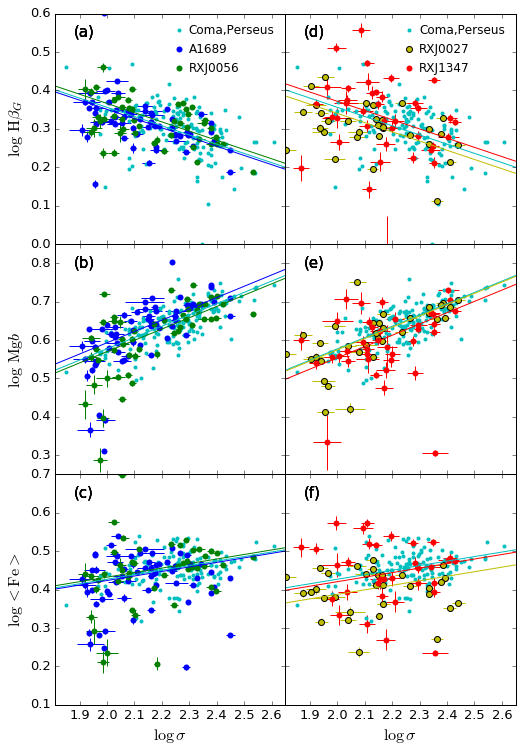

In [9]:
gs1 = gridspec.GridSpec(3,2)
gs1.update(left=0.15, right=0.95, bottom=0.15, top=0.95, wspace=0.0, hspace=0.0)
fig = plt.figure(figsize=(8,12))
ax = plt.axes([0., 0., 1., 1.], frameon=False, xticks=[],yticks=[])

print 'Cluster line     zero   dzero rms   N  Nrel'

ax1 = plt.subplot(gs1[0,0])
plt.setp(ax1.get_xticklabels(), visible=False)
plt.setp(ax1.get_yticklabels(), fontsize=13)

scatterplot(df_coma.lsigma_cor, df_coma.lhbetaem_cor, None, None, 'co', 4,
           '', r'$\log\,\, {\rm H}\beta _G$', lsigmalim[0], lsigmalim[1], 0., 0.6, ax1, '(a)', 'Coma')
scatterplot(df_pers.lsigma_cor, df_pers.lhbetaem_cor, None, None, 'co', 4,
           '', r'$\log\,\, {\rm H}\beta _G$', lsigmalim[0], lsigmalim[1], 0., 0.6, ax1, '(a)', 'Perseus')
scatterplot(df_a1689.lsigma_cor, df_a1689.lhbetaem_cor, df_a1689.e_lsigma, df_a1689.e_lhbetaem, 'bo', 6,
           '', r'$\log\,\, {\rm H}\beta _G$', lsigmalim[0], lsigmalim[1], 0., 0.6, ax1, '(a)', 'A1689')
scatterplot(df_rxj0056.lsigma_cor, df_rxj0056.lhbetaem_cor, df_rxj0056.e_lsigma, df_rxj0056.e_lhbetaem, 'go', 6,
           '', r'$\log\,\, {\rm H}\beta _G$', lsigmalim[0], lsigmalim[1], 0., 0.6, ax1, '(a)', 'RXJ0056')

# The Coma relation
calcline(lsigmalim[0], lsigmalim[1], lhbeta[0], lhbeta[1], 'c')
# A1689
da1689 = df_a1689.lhbetaem_cor-lhbeta[0]*df_a1689.lsigma_cor-lhbeta[1]
calcline(lsigmalim[0], lsigmalim[1], lhbeta[0], np.nanmedian(da1689)+lhbeta[1], 'b')
print 'A1689  ', 'lHbetaG {0:6.3f}'.format(np.nanmedian(da1689)+lhbeta[1]), \
    '{0:6.3f}'.format(np.nanmedian(da1689)), \
    '{0:5.3f}'.format(np.nanstd(da1689)), da1689.size, np.count_nonzero(~np.isnan(da1689))
# RXJ0056
drxj0056 = df_rxj0056.lhbetaem_cor-lhbeta[0]*df_rxj0056.lsigma_cor-lhbeta[1]
calcline(lsigmalim[0], lsigmalim[1], lhbeta[0], np.nanmedian(drxj0056)+lhbeta[1], 'g')
print 'RXJ0056', 'lHbetaG {0:6.3f}'.format(np.nanmedian(drxj0056)+lhbeta[1]), \
    '{0:6.3f}'.format(np.nanmedian(drxj0056)), \
    '{0:5.3f}'.format(np.nanstd(drxj0056)), drxj0056.size, np.count_nonzero(~np.isnan(drxj0056))
    
df_zps['zp_lhbeta']['A1689'] = np.nanmedian(da1689) + lhbeta[1]
df_zps['rms_lhbeta']['A1689'] = np.nanstd(da1689)
df_zps['ngal_lhbeta']['A1689'] = np.count_nonzero(~np.isnan(da1689))
df_zps['zp_lhbeta']['RXJ0056'] = np.nanmedian(drxj0056) + lhbeta[1]
df_zps['rms_lhbeta']['RXJ0056'] = np.nanstd(drxj0056)
df_zps['ngal_lhbeta']['RXJ0056'] = np.count_nonzero(~np.isnan(drxj0056))

# get handles
handles, labels = ax1.get_legend_handles_labels()
# remove the errorbars
handles = [h[0] for h in handles]
# Remove extra legend entry due to Coma and Perseus coming from different data frames
handles = handles[1:4]
labels = labels[1:4]
labels[0] = 'Coma,Perseus'
# use them in the legend
ax1.legend(handles, labels, loc='upper right',numpoints=1, handletextpad=-0.2, frameon=False)


ax2 = plt.subplot(gs1[0,1])
plt.setp(ax2.get_xticklabels(), visible=False)
plt.setp(ax2.get_yticklabels(), visible=False)

scatterplot(df_coma.lsigma_cor, df_coma.lhbetaem_cor, None, None, 'co', 4,
           '', '', lsigmalim[0], lsigmalim[1], 0., 0.6, ax2, '(d)', 'Coma')
scatterplot(df_pers.lsigma_cor, df_pers.lhbetaem_cor, None, None, 'co', 4,
           '', '', lsigmalim[0], lsigmalim[1], 0., 0.6, ax2, '(d)', 'Perseus')
scatterplot(df_rxj0027.lsigma_cor, df_rxj0027.lhbetaem_cor, df_rxj0027.e_lsigma, df_rxj0027.e_lhbetaem, 'yo', 6,
           '', '', lsigmalim[0], lsigmalim[1], 0., 0.6, ax2, '(d)', 'RXJ0027')
scatterplot(df_rxj1347.lsigma_cor, df_rxj1347.lhbetaem_cor, df_rxj1347.e_lsigma, df_rxj1347.e_lhbetaem, 'ro', 6,
           '', '', lsigmalim[0], lsigmalim[1], 0., 0.6, ax2, '(d)', 'RXJ1347')

# The Coma relation
calcline(lsigmalim[0], lsigmalim[1], lhbeta[0], lhbeta[1], 'c')
# RXJ0027
drxj0027 = df_rxj0027.lhbetaem_cor-lhbeta[0]*df_rxj0027.lsigma_cor-lhbeta[1]
calcline(lsigmalim[0], lsigmalim[1], lhbeta[0], np.nanmedian(drxj0027)+lhbeta[1], 'y')
print 'RXJ0027', 'lHbetaG {0:6.3f}'.format(np.nanmedian(drxj0027)+lhbeta[1]), \
    '{0:6.3f}'.format(np.nanmedian(drxj0027)), \
    '{0:5.3f}'.format(np.nanstd(drxj0027)), drxj0027.size, np.count_nonzero(~np.isnan(drxj0027))
# RXJ1347
drxj1347 = df_rxj1347.lhbetaem_cor-lhbeta[0]*df_rxj1347.lsigma_cor-lhbeta[1]
calcline(lsigmalim[0], lsigmalim[1], lhbeta[0], np.nanmedian(drxj1347)+lhbeta[1], 'r')
print 'RXJ1347', 'lHbetaG {0:6.3f}'.format(np.nanmedian(drxj1347)+lhbeta[1]), \
    '{0:6.3f}'.format(np.nanmedian(drxj1347)), \
    '{0:5.3f}'.format(np.nanstd(drxj1347)), drxj1347.size, np.count_nonzero(~np.isnan(drxj1347))

df_zps['zp_lhbeta']['RXJ0027'] = np.nanmedian(drxj0027) + lhbeta[1]
df_zps['rms_lhbeta']['RXJ0027'] = np.nanstd(drxj0027)
df_zps['ngal_lhbeta']['RXJ0027'] = np.count_nonzero(~np.isnan(drxj0027))
df_zps['zp_lhbeta']['RXJ1347'] = np.nanmedian(drxj1347) + lhbeta[1]
df_zps['rms_lhbeta']['RXJ1347'] = np.nanstd(drxj1347)
df_zps['ngal_lhbeta']['RXJ1347'] = np.count_nonzero(~np.isnan(drxj1347))

df_zps['e_zp_lhbeta'] = df_zps.rms_lhbeta / np.sqrt(df_zps.ngal_lhbeta)

# get handles
handles, labels = ax2.get_legend_handles_labels()
# remove the errorbars
handles = [h[0] for h in handles]
# Remove extra legend entry due to Coma and Perseus coming from different data frames
handles = handles[1:4]
labels = labels[1:4]
labels[0] = 'Coma,Perseus'
# use them in the legend
ax2.legend(handles, labels, loc='upper right',numpoints=1, handletextpad=-0.2, frameon=False)

# =============
ax3 = plt.subplot(gs1[1,0])
plt.setp(ax3.get_xticklabels(), visible=False)
plt.setp(ax3.get_yticklabels(), fontsize=13)

scatterplot(df_coma.lsigma_cor, df_coma.lmgb_cor, None, None, 'co', 4,
           '', r'$\log\,\, {\rm Mg}b$', lsigmalim[0], lsigmalim[1], 0.25, 0.85, ax3, '(b)', 'Coma')
scatterplot(df_pers.lsigma_cor, df_pers.lmgb_cor, None, None, 'co', 4,
           '', r'$\log\,\, {\rm Mg}b$', lsigmalim[0], lsigmalim[1], 0.25, 0.85, ax3, '(b)', 'Perseus')
scatterplot(df_a1689.lsigma_cor, df_a1689.lmgb_cor, df_a1689.e_lsigma, df_a1689.e_lmgb, 'bo', 6,
           '', r'$\log\,\, {\rm Mg}b$', lsigmalim[0], lsigmalim[1], 0.25, 0.85, ax3, '(b)', 'A1689')
scatterplot(df_rxj0056.lsigma_cor, df_rxj0056.lmgb_cor, df_rxj0056.e_lsigma, df_rxj0056.e_lmgb, 'go', 6,
           '', r'$\log\,\, {\rm Mg}b$', lsigmalim[0], lsigmalim[1], 0.25, 0.85, ax3, '(b)', 'RXJ0056')
# The Coma relation
calcline(lsigmalim[0], lsigmalim[1], lmgb[0], lmgb[1], 'c')
# A1689
da1689 = df_a1689.lmgb_cor-lmgb[0]*df_a1689.lsigma_cor-lmgb[1]
calcline(lsigmalim[0], lsigmalim[1], lmgb[0], np.nanmedian(da1689)+lmgb[1], 'b')
print 'A1689  ', 'lMgb    {0:6.3f}'.format(np.nanmedian(da1689)+lmgb[1]), \
    '{0:6.3f}'.format(np.nanmedian(da1689)), \
    '{0:5.3f}'.format(np.nanstd(da1689)), da1689.size, np.count_nonzero(~np.isnan(da1689))
# RXJ0056
drxj0056 = df_rxj0056.lmgb_cor-lmgb[0]*df_rxj0056.lsigma_cor-lmgb[1]
calcline(lsigmalim[0], lsigmalim[1], lmgb[0], np.nanmedian(drxj0056)+lmgb[1], 'g')
print 'RXJ0056', 'lMgb    {0:6.3f}'.format(np.nanmedian(drxj0056)+lmgb[1]), \
    '{0:6.3f}'.format(np.nanmedian(drxj0056)), \
    '{0:5.3f}'.format(np.nanstd(drxj0056)), drxj0056.size, np.count_nonzero(~np.isnan(drxj0056))

df_zps['zp_lmgb']['A1689'] = np.nanmedian(da1689) + lmgb[1]
df_zps['rms_lmgb']['A1689'] = np.nanstd(da1689)
df_zps['ngal_lmgb']['A1689'] = np.count_nonzero(~np.isnan(da1689))
df_zps['zp_lmgb']['RXJ0056'] = np.nanmedian(drxj0056) + lmgb[1]
df_zps['rms_lmgb']['RXJ0056'] = np.nanstd(drxj0056)
df_zps['ngal_lmgb']['RXJ0056'] = np.count_nonzero(~np.isnan(drxj0056))

ax4 = plt.subplot(gs1[1,1])
plt.setp(ax4.get_xticklabels(), visible=False)
plt.setp(ax4.get_yticklabels(), visible=False)

scatterplot(df_coma.lsigma_cor, df_coma.lmgb_cor, None, None, 'co', 4,
           '', '', lsigmalim[0], lsigmalim[1], 0.25, 0.85, ax4, '(e)', 'Coma')
scatterplot(df_pers.lsigma_cor, df_pers.lmgb_cor, None, None, 'co', 4,
           '', '', lsigmalim[0], lsigmalim[1], 0.25, 0.85, ax4, '(e)', 'Perseus')
scatterplot(df_rxj0027.lsigma_cor, df_rxj0027.lmgb_cor, df_rxj0027.e_lsigma, df_rxj0027.e_lmgb, 'yo', 6,
           '', '', lsigmalim[0], lsigmalim[1], 0.25, 0.85, ax4, '(e)', 'RXJ0027')
scatterplot(df_rxj1347.lsigma_cor, df_rxj1347.lmgb_cor, df_rxj1347.e_lsigma, df_rxj1347.e_lmgb, 'ro', 6,
           '', '', lsigmalim[0], lsigmalim[1], 0.25, 0.85, ax4, '(e)', 'RXJ1347')
# The Coma relation
calcline(lsigmalim[0], lsigmalim[1], lmgb[0], lmgb[1], 'c')
# RXJ0027
drxj0027 = df_rxj0027.lmgb_cor-lmgb[0]*df_rxj0027.lsigma_cor-lmgb[1]
calcline(lsigmalim[0], lsigmalim[1], lmgb[0], np.nanmedian(drxj0027)+lmgb[1], 'y')
print 'RXJ0027', 'lMgb    {0:6.3f}'.format(np.nanmedian(drxj0027)+lmgb[1]), \
    '{0:6.3f}'.format(np.nanmedian(drxj0027)), \
    '{0:5.3f}'.format(np.nanstd(drxj0027)), drxj0027.size, np.count_nonzero(~np.isnan(drxj0027))
# RXJ1347
drxj1347 = df_rxj1347.lmgb_cor-lmgb[0]*df_rxj1347.lsigma_cor-lmgb[1]
calcline(lsigmalim[0], lsigmalim[1], lmgb[0], np.nanmedian(drxj1347)+lmgb[1], 'r')
print 'RXJ1347', 'lMgb    {0:6.3f}'.format(np.nanmedian(drxj1347)+lmgb[1]), \
    '{0:6.3f}'.format(np.nanmedian(drxj1347)), \
    '{0:5.3f}'.format(np.nanstd(drxj1347)), drxj1347.size, np.count_nonzero(~np.isnan(drxj1347))

df_zps['zp_lmgb']['RXJ0027'] = np.nanmedian(drxj0027) + lmgb[1]
df_zps['rms_lmgb']['RXJ0027'] = np.nanstd(drxj0027)
df_zps['ngal_lmgb']['RXJ0027'] = np.count_nonzero(~np.isnan(drxj0027))
df_zps['zp_lmgb']['RXJ1347'] = np.nanmedian(drxj1347) + lmgb[1]
df_zps['rms_lmgb']['RXJ1347'] = np.nanstd(drxj1347)
df_zps['ngal_lmgb']['RXJ1347'] = np.count_nonzero(~np.isnan(drxj1347))

df_zps['e_zp_lmgb'] = df_zps.rms_lmgb / np.sqrt(df_zps.ngal_lmgb)

# ===============
ax5 = plt.subplot(gs1[2,0])
plt.setp(ax5.get_xticklabels(), fontsize=13)
plt.setp(ax5.get_yticklabels(), fontsize=13)

scatterplot(df_coma.lsigma_cor, df_coma.lfe_cor, None, None, 'co', 4,
           r'$\log\, \sigma$', r'$\log\, <{\rm Fe} >$', lsigmalim[0], lsigmalim[1], 0.1, 0.7, ax5, '(c)', 'Coma')
scatterplot(df_pers.lsigma_cor, df_pers.lfe_cor, None, None, 'co', 4,
           r'$\log\, \sigma$', r'$\log\, <{\rm Fe} >$', lsigmalim[0], lsigmalim[1], 0.1, 0.7, ax5, '(c)', 'Perseus')
scatterplot(df_a1689.lsigma_cor, df_a1689.lfe_cor, df_a1689.e_lsigma, df_a1689.e_lfe, 'bo', 6,
           r'$\log\, \sigma$', r'$\log\, <{\rm Fe} >$', lsigmalim[0], lsigmalim[1], 0.1, 0.7, ax5, '(c)', 'A1689')
scatterplot(df_rxj0056.lsigma_cor, df_rxj0056.lfe_cor, df_rxj0056.e_lsigma, df_rxj0056.e_lfe, 'go', 6, 
           r'$\log\, \sigma$', r'$\log\, <{\rm Fe} >$', lsigmalim[0], lsigmalim[1], 0.1, 0.7, ax5, '(c)', 'RXJ0056')
# The Coma relation
calcline(lsigmalim[0], lsigmalim[1], lfe[0], lfe[1], 'c')
# A1689
da1689 = df_a1689.lfe_cor-lfe[0]*df_a1689.lsigma_cor-lfe[1]
calcline(lsigmalim[0], lsigmalim[1], lfe[0], np.nanmedian(da1689)+lfe[1], 'b')
print 'A1689  ', 'lFe     {0:6.3f}'.format(np.nanmedian(da1689)+lfe[1]), \
    '{0:6.3f}'.format(np.nanmedian(da1689)), \
    '{0:5.3f}'.format(np.nanstd(da1689)), da1689.size, np.count_nonzero(~np.isnan(da1689))
# RXJ0056
drxj0056 = df_rxj0056.lfe_cor-lfe[0]*df_rxj0056.lsigma_cor-lfe[1]
calcline(lsigmalim[0], lsigmalim[1], lfe[0], np.nanmedian(drxj0056)+lfe[1], 'g')
print 'RXJ0056', 'lFe     {0:6.3f}'.format(np.nanmedian(drxj0056)+lfe[1]), \
    '{0:6.3f}'.format(np.nanmedian(drxj0056)), \
    '{0:5.3f}'.format(np.nanstd(drxj0056)), drxj0056.size, np.count_nonzero(~np.isnan(drxj0056))
    
df_zps['zp_lfe']['A1689'] = np.nanmedian(da1689) + lfe[1]
df_zps['rms_lfe']['A1689'] = np.nanstd(da1689)
df_zps['ngal_lfe']['A1689'] = np.count_nonzero(~np.isnan(da1689))
df_zps['zp_lfe']['RXJ0056'] = np.nanmedian(drxj0056) + lfe[1]
df_zps['rms_lfe']['RXJ0056'] = np.nanstd(drxj0056)
df_zps['ngal_lfe']['RXJ0056'] = np.count_nonzero(~np.isnan(drxj0056))

ax6 = plt.subplot(gs1[2,1])
plt.setp(ax6.get_xticklabels(), fontsize=13)
plt.setp(ax6.get_yticklabels(), visible=False)

scatterplot(df_coma.lsigma_cor, df_coma.lfe_cor, None, None, 'co', 4,
           r'$\log\, \sigma$', '', lsigmalim[0], lsigmalim[1], 0.1, 0.7, ax6, '(f)', 'Coma')
scatterplot(df_pers.lsigma_cor, df_pers.lfe_cor, None, None, 'co', 4,
           r'$\log\, \sigma$', '', lsigmalim[0], lsigmalim[1], 0.1, 0.7, ax6, '(f)', 'Perseus')
scatterplot(df_rxj0027.lsigma_cor, df_rxj0027.lfe_cor, df_rxj0027.e_lsigma, df_rxj0027.e_lfe, 'yo', 6,
           r'$\log\, \sigma$', '', lsigmalim[0], lsigmalim[1], 0.1, 0.7, ax6, '(f)', 'RXJ0027')
scatterplot(df_rxj1347.lsigma_cor, df_rxj1347.lfe_cor, df_rxj1347.e_lsigma, df_rxj1347.e_lfe, 'ro', 6,
           r'$\log\, \sigma$', '', lsigmalim[0], lsigmalim[1], 0.1, 0.7, ax6, '(f)', 'RXJ1347')
# The Coma relation
calcline(lsigmalim[0], lsigmalim[1], lfe[0], lfe[1], 'c')
# RXJ0027
drxj0027 = df_rxj0027.lfe_cor-lfe[0]*df_rxj0027.lsigma_cor-lfe[1]
calcline(lsigmalim[0], lsigmalim[1], lfe[0], np.nanmedian(drxj0027)+lfe[1], 'y')
print 'RXJ0027', 'lFe     {0:6.3f}'.format(np.nanmedian(drxj0027)+lfe[1]), \
    '{0:6.3f}'.format(np.nanmedian(drxj0027)), \
    '{0:5.3f}'.format(np.nanstd(drxj0027)), drxj0027.size, np.count_nonzero(~np.isnan(drxj0027))
# RXJ1347
drxj1347 = df_rxj1347.lfe_cor-lfe[0]*df_rxj1347.lsigma_cor-lfe[1]
calcline(lsigmalim[0], lsigmalim[1], lfe[0], np.nanmedian(drxj1347)+lfe[1], 'r')
print 'RXJ1347', 'lFe     {0:6.3f}'.format(np.nanmedian(drxj1347)+lfe[1]), \
    '{0:6.3f}'.format(np.nanmedian(drxj1347)), \
    '{0:5.3f}'.format(np.nanstd(drxj1347)), drxj1347.size, np.count_nonzero(~np.isnan(drxj1347))

df_zps['zp_lfe']['RXJ0027'] = np.nanmedian(drxj0027) + lfe[1]
df_zps['rms_lfe']['RXJ0027'] = np.nanstd(drxj0027)
df_zps['ngal_lfe']['RXJ0027'] = np.count_nonzero(~np.isnan(drxj0027))
df_zps['zp_lfe']['RXJ1347'] = np.nanmedian(drxj1347) + lfe[1]
df_zps['rms_lfe']['RXJ1347'] = np.nanstd(drxj1347)
df_zps['ngal_lfe']['RXJ1347'] = np.count_nonzero(~np.isnan(drxj1347))
df_zps['e_zp_lfe'] = df_zps.rms_lfe / np.sqrt(df_zps.ngal_lfe)

df_zps['dzp_lhbeta'] = df_zps.zp_lhbeta - df_zps.at['lowz','zp_lhbeta']
df_zps['dzp_lmgb'] = df_zps.zp_lmgb - df_zps.at['lowz','zp_lmgb']
df_zps['dzp_lfe'] = df_zps.zp_lfe - df_zps.at['lowz','zp_lfe']

#df_zps['dzp_lfe']['lowz']

# set the line indices for the high z clusters and low z comparison sample
df_zps['lhbeta'] = lhbeta[0]*2.24 + df_zps.zp_lhbeta
df_zps['lmgb'] = lmgb[0]*2.24 + df_zps.zp_lmgb
df_zps['lfe'] = lfe[0]*2.24 + df_zps.zp_lfe
df_zps['lhdga'] = lhdga[0]*2.24 + df_zps.zp_lhdga
df_zps['lc4668'] = lc4668[0]*2.24 + df_zps.zp_lc4668
df_zps['lfe4383'] = lfe4383[0]*2.24 + df_zps.zp_lfe4383
df_zps['cn3883'] = cn3883[0]*2.24 + df_zps.zp_cn3883
df_zps['e_lhbeta'] = df_zps.e_zp_lhbeta
df_zps['e_lmgb'] = df_zps.e_zp_lmgb
df_zps['e_lfe'] = df_zps.e_zp_lfe
df_zps['e_lhdga'] = df_zps.e_zp_lhdga
df_zps['e_lc4668'] = df_zps.e_zp_lc4668
df_zps['e_lfe4383'] = df_zps.e_zp_lfe4383
df_zps['e_cn3883'] = df_zps.e_zp_cn3883

# Combination indices
df_zps['lmgfe'] = (df_zps.lmgb + df_zps.lfe) / 2.
df_zps['e_lmgfe'] = (df_zps.e_zp_lmgb **2 + df_zps.e_zp_lfe **2) ** 0.5 / 2.
df_zps['lc4668fe'] = df_zps.lc4668 + df_zps.lfe4383/3.
df_zps['e_lc4668fe'] = (df_zps.e_zp_lc4668 **2 + (df_zps.e_zp_lfe4383/3.) **2) ** 0.5

print df_zps

plt.savefig('lsigma_visline.eps', format="eps")

Cluster line     zero   dzero rms   N  Nrel
A1689   HdgA     0.097 -0.001 0.041 63 61
RXJ0056 HdgA     0.105  0.007 0.076 50 48
RXJ0027 HdgA     0.119  0.021 0.021 33 33
RXJ1347 HdgA     0.126  0.028 0.036 39 39
A1689   C4668    0.110  0.003 0.075 63 49
RXJ0056 C4668    0.088 -0.019 0.226 50 33
RXJ0027 C4668    0.062 -0.045 0.185 33 33
RXJ1347 C4668    0.059 -0.048 0.206 39 39
A1689   Fe4383   0.248 -0.015 0.159 63 63
RXJ0056 Fe4383   0.221 -0.042 0.251 50 50
RXJ0027 Fe4383   0.202 -0.061 0.083 33 33
RXJ1347 Fe4383   0.196 -0.067 0.213 39 38
A1689   CN3883  -0.379  0.031 0.059 63 50
RXJ0056 CN3883  -0.403  0.007 0.060 50 40
RXJ0027 CN3883  -0.383  0.027 0.049 33 31
RXJ1347 cn3883  -0.446 -0.036 0.059 39 25
         redshift  zp_lhbeta  rms_lhbeta  ngal_lhbeta   zp_lmgb  rms_lmgb  \
lowz       0.0240   0.836000    0.080000        157.0 -0.011000  0.040000   
A1689      0.1865   0.830685    0.111436         63.0  0.004789  0.067226   
RXJ0056    0.1922   0.846087    0.081136         50.0

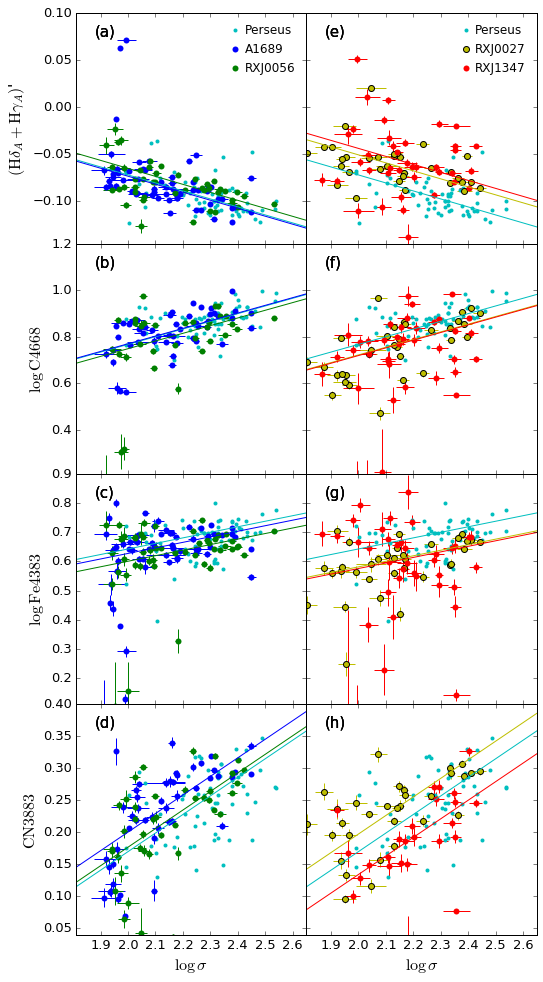

In [10]:
gs1 = gridspec.GridSpec(4,2)
gs1.update(left=0.15, right=0.95, bottom=0.15, top=0.95, wspace=0.0, hspace=0.0)
fig = plt.figure(figsize=(8,16))
ax = plt.axes([0., 0., 1., 1.], frameon=False, xticks=[],yticks=[])

print 'Cluster line     zero   dzero rms   N  Nrel'

ax1 = plt.subplot(gs1[0,0])
plt.setp(ax1.get_xticklabels(), visible=False)
plt.setp(ax1.get_yticklabels(), fontsize=13)

scatterplot(df_pers.lsigma_cor, df_pers.lhdga_cor, None, None, 'co', 4,
           '', r"$({\rm H}\delta _A + {\rm H}\gamma _A)$'", lsigmalim[0], lsigmalim[1], -0.145, 0.1, ax1, '(a)', 'Perseus')
scatterplot(df_a1689.lsigma_cor, df_a1689.lhdga_cor, df_a1689.e_lsigma, df_a1689.e_lhdga, 'bo', 6,
           '', r"$({\rm H}\delta _A + {\rm H}\gamma _A)$'", lsigmalim[0], lsigmalim[1], -0.145, 0.1, ax1, '(a)', 'A1689')
scatterplot(df_rxj0056.lsigma_cor, df_rxj0056.lhdga_cor, df_rxj0056.e_lsigma, df_rxj0056.e_lhdga, 'go', 6,
           '', r"$({\rm H}\delta _A + {\rm H}\gamma _A)$'", lsigmalim[0], lsigmalim[1], -0.145, 0.1, ax1, '(a)', 'RXJ0056')
# The Coma relation
calcline(lsigmalim[0], lsigmalim[1], lhdga[0], lhdga[1], 'c')
# A1689
da1689 = df_a1689.lhdga_cor-lhdga[0]*df_a1689.lsigma_cor-lhdga[1]
calcline(lsigmalim[0], lsigmalim[1], lhdga[0], np.nanmedian(da1689)+lhdga[1], 'b')
print 'A1689  ', 'HdgA    {0:6.3f}'.format(np.nanmedian(da1689)+lhdga[1]), \
    '{0:6.3f}'.format(np.nanmedian(da1689)), \
    '{0:5.3f}'.format(np.nanstd(da1689)), da1689.size, np.count_nonzero(~np.isnan(da1689))
# RXJ0056
drxj0056 = df_rxj0056.lhdga_cor-lhdga[0]*df_rxj0056.lsigma_cor-lhdga[1]
calcline(lsigmalim[0], lsigmalim[1], lhdga[0], np.nanmedian(drxj0056)+lhdga[1], 'g')
print 'RXJ0056', 'HdgA    {0:6.3f}'.format(np.nanmedian(drxj0056)+lhdga[1]), \
    '{0:6.3f}'.format(np.nanmedian(drxj0056)), \
    '{0:5.3f}'.format(np.nanstd(drxj0056)), drxj0056.size, np.count_nonzero(~np.isnan(drxj0056))

df_zps['zp_lhdga']['A1689'] = np.nanmedian(da1689) + lhdga[1]
df_zps['rms_lhdga']['A1689'] = np.nanstd(da1689)
df_zps['ngal_lhdga']['A1689'] = np.count_nonzero(~np.isnan(da1689))
df_zps['zp_lhdga']['RXJ0056'] = np.nanmedian(drxj0056) + lhdga[1]
df_zps['rms_lhdga']['RXJ0056'] = np.nanstd(drxj0056)
df_zps['ngal_lhdga']['RXJ0056'] = np.count_nonzero(~np.isnan(drxj0056))

# get handles
handles, labels = ax1.get_legend_handles_labels()
# remove the errorbars
handles = [h[0] for h in handles]
# use them in the legend
ax1.legend(handles, labels, loc='upper right',numpoints=1, handletextpad=-0.2, frameon=False)


ax2 = plt.subplot(gs1[0,1])
plt.setp(ax2.get_xticklabels(), visible=False)
plt.setp(ax2.get_yticklabels(), visible=False)

scatterplot(df_pers.lsigma_cor, df_pers.lhdga_cor, None, None, 'co', 4,
           '', '', lsigmalim[0], lsigmalim[1], -0.145, 0.1, ax2, '(e)', 'Perseus')
scatterplot(df_rxj0027.lsigma_cor, df_rxj0027.lhdga_cor, df_rxj0027.e_lsigma, df_rxj0027.e_lhdga, 'yo', 6,
           '', '', lsigmalim[0], lsigmalim[1], -0.145, 0.1, ax2, '(e)', 'RXJ0027')
scatterplot(df_rxj1347.lsigma_cor, df_rxj1347.lhdga_cor, df_rxj1347.e_lsigma, df_rxj1347.e_lhdga, 'ro', 6,
           '', '', lsigmalim[0], lsigmalim[1], -0.145, 0.1, ax2, '(e)', 'RXJ1347')
# The Coma relation
calcline(lsigmalim[0], lsigmalim[1], lhdga[0], lhdga[1], 'c')
# RXJ0027
drxj0027 = df_rxj0027.lhdga_cor-lhdga[0]*df_rxj0027.lsigma_cor-lhdga[1]
calcline(lsigmalim[0], lsigmalim[1], lhdga[0], np.nanmedian(drxj0027)+lhdga[1], 'y')
print 'RXJ0027', 'HdgA    {0:6.3f}'.format(np.nanmedian(drxj0027)+lhdga[1]), \
    '{0:6.3f}'.format(np.nanmedian(drxj0027)), \
    '{0:5.3f}'.format(np.nanstd(drxj0027)), drxj0027.size, np.count_nonzero(~np.isnan(drxj0027))
# RXJ1347
drxj1347 = df_rxj1347.lhdga_cor-lhdga[0]*df_rxj1347.lsigma_cor-lhdga[1]
calcline(lsigmalim[0], lsigmalim[1], lhdga[0], np.nanmedian(drxj1347)+lhdga[1], 'r')
print 'RXJ1347', 'HdgA    {0:6.3f}'.format(np.nanmedian(drxj1347)+lhdga[1]), \
    '{0:6.3f}'.format(np.nanmedian(drxj1347)), \
    '{0:5.3f}'.format(np.nanstd(drxj1347)), drxj1347.size, np.count_nonzero(~np.isnan(drxj1347))

df_zps['zp_lhdga']['RXJ0027'] = np.nanmedian(drxj0027) + lhdga[1]
df_zps['rms_lhdga']['RXJ0027'] = np.nanstd(drxj0027)
df_zps['ngal_lhdga']['RXJ0027'] = np.count_nonzero(~np.isnan(drxj0027))
df_zps['zp_lhdga']['RXJ1347'] = np.nanmedian(drxj1347) + lhdga[1]
df_zps['rms_lhdga']['RXJ1347'] = np.nanstd(drxj1347)
df_zps['ngal_lhdga']['RXJ1347'] = np.count_nonzero(~np.isnan(drxj1347))

df_zps['e_zp_lhdga'] = df_zps.rms_lhdga / np.sqrt(df_zps.ngal_lhdga)
    
# get handles
handles, labels = ax2.get_legend_handles_labels()
# remove the errorbars
handles = [h[0] for h in handles]
# use them in the legend
ax2.legend(handles, labels, loc='upper right',numpoints=1, handletextpad=-0.2, frameon=False)

# =============
ax3 = plt.subplot(gs1[1,0])
plt.setp(ax3.get_xticklabels(), visible=False)
plt.setp(ax3.get_yticklabels(), fontsize=13)

scatterplot(df_pers.lsigma_cor, df_pers.lc4668_cor, None, None, 'co', 4,
           '', r'$\log\, {\rm C4668}$', lsigmalim[0], lsigmalim[1], 0.21, 1.2, ax3, '(b)', 'Perseus')
scatterplot(df_a1689.lsigma_cor, df_a1689.lc4668_cor, df_a1689.e_lsigma, df_a1689.e_lc4668, 'bo', 6,
           '', r'$\log\, {\rm C4668}$', lsigmalim[0], lsigmalim[1], 0.21, 1.2, ax3, '(b)', 'A1689')
scatterplot(df_rxj0056.lsigma_cor, df_rxj0056.lc4668_cor, df_rxj0056.e_lsigma, df_rxj0056.e_lc4668, 'go', 6,
           '', r'$\log\, {\rm C4668}$', lsigmalim[0], lsigmalim[1], 0.21, 1.2, ax3, '(b)', 'RXJ0056')
# The Coma relation
calcline(lsigmalim[0], lsigmalim[1], lc4668[0], lc4668[1], 'c')
# A1689
da1689 = df_a1689.lc4668_cor-lc4668[0]*df_a1689.lsigma_cor-lc4668[1]
calcline(lsigmalim[0], lsigmalim[1], lc4668[0], np.nanmedian(da1689)+lc4668[1], 'b')
print 'A1689  ', 'C4668   {0:6.3f}'.format(np.nanmedian(da1689)+lc4668[1]), \
    '{0:6.3f}'.format(np.nanmedian(da1689)), \
    '{0:5.3f}'.format(np.nanstd(da1689)), da1689.size, np.count_nonzero(~np.isnan(da1689))
# RXJ0056
drxj0056 = df_rxj0056.lc4668_cor-lc4668[0]*df_rxj0056.lsigma_cor-lc4668[1]
calcline(lsigmalim[0], lsigmalim[1], lc4668[0], np.nanmedian(drxj0056)+lc4668[1], 'g')
print 'RXJ0056', 'C4668   {0:6.3f}'.format(np.nanmedian(drxj0056)+lc4668[1]), \
    '{0:6.3f}'.format(np.nanmedian(drxj0056)), \
    '{0:5.3f}'.format(np.nanstd(drxj0056)), drxj0056.size, np.count_nonzero(~np.isnan(drxj0056))
df_zps['zp_lc4668']['A1689'] = np.nanmedian(da1689) + lc4668[1]
df_zps['rms_lc4668']['A1689'] = np.nanstd(da1689)
df_zps['ngal_lc4668']['A1689'] = np.count_nonzero(~np.isnan(da1689))
df_zps['zp_lc4668']['RXJ0056'] = np.nanmedian(drxj0056) + lc4668[1]
df_zps['rms_lc4668']['RXJ0056'] = np.nanstd(drxj0056)
df_zps['ngal_lc4668']['RXJ0056'] = np.count_nonzero(~np.isnan(drxj0056))    

ax4 = plt.subplot(gs1[1,1])
plt.setp(ax4.get_xticklabels(), visible=False)
plt.setp(ax4.get_yticklabels(), visible=False)

scatterplot(df_pers.lsigma_cor, df_pers.lc4668_cor, None, None, 'co', 4,
           '', '', lsigmalim[0], lsigmalim[1], 0.21, 1.2, ax4, '(f)', 'Perseus')
scatterplot(df_rxj0027.lsigma_cor, df_rxj0027.lc4668_cor, df_rxj0027.e_lsigma, df_rxj0027.e_lc4668, 'yo', 6,
           '', '', lsigmalim[0], lsigmalim[1], 0.21, 1.2, ax4, '(f)', 'RXJ0027')
scatterplot(df_rxj1347.lsigma_cor, df_rxj1347.lc4668_cor, df_rxj1347.e_lsigma, df_rxj1347.e_lc4668, 'ro', 6,
           '', '', lsigmalim[0], lsigmalim[1], 0.21, 1.2, ax4, '(f)', 'RXJ1347')
# The Coma relation
calcline(lsigmalim[0], lsigmalim[1], lc4668[0], lc4668[1], 'c')
# RXJ0027
drxj0027 = df_rxj0027.lc4668_cor-lc4668[0]*df_rxj0027.lsigma_cor-lc4668[1]
calcline(lsigmalim[0], lsigmalim[1], lc4668[0], np.nanmedian(drxj0027)+lc4668[1], 'y')
print 'RXJ0027', 'C4668   {0:6.3f}'.format(np.nanmedian(drxj0027)+lc4668[1]), \
    '{0:6.3f}'.format(np.nanmedian(drxj0027)), \
    '{0:5.3f}'.format(np.nanstd(drxj0027)), drxj0027.size, np.count_nonzero(~np.isnan(drxj0027))
# RXJ1347
drxj1347 = df_rxj1347.lc4668_cor-lc4668[0]*df_rxj1347.lsigma_cor-lc4668[1]
calcline(lsigmalim[0], lsigmalim[1], lc4668[0], np.nanmedian(drxj1347)+lc4668[1], 'r')
print 'RXJ1347', 'C4668   {0:6.3f}'.format(np.nanmedian(drxj1347)+lc4668[1]), \
    '{0:6.3f}'.format(np.nanmedian(drxj1347)), \
    '{0:5.3f}'.format(np.nanstd(drxj1347)), drxj1347.size, np.count_nonzero(~np.isnan(drxj1347))
df_zps['zp_lc4668']['RXJ0027'] = np.nanmedian(drxj0027) + lc4668[1]
df_zps['rms_lc4668']['RXJ0027'] = np.nanstd(drxj0027)
df_zps['ngal_lc4668']['RXJ0027'] = np.count_nonzero(~np.isnan(drxj0027))
df_zps['zp_lc4668']['RXJ1347'] = np.nanmedian(drxj1347) + lc4668[1]
df_zps['rms_lc4668']['RXJ1347'] = np.nanstd(drxj1347)
df_zps['ngal_lc4668']['RXJ1347'] = np.count_nonzero(~np.isnan(drxj1347))

df_zps['e_zp_lc4668'] = df_zps.rms_lc4668 / np.sqrt(df_zps.ngal_lc4668)

# ===============
ax5 = plt.subplot(gs1[2,0])
plt.setp(ax5.get_xticklabels(), visible=False)
plt.setp(ax5.get_yticklabels(), fontsize=13)

scatterplot(df_pers.lsigma_cor, df_pers.lfe4383_cor, None, None, 'co', 4,
           '', r'$\log\, {\rm Fe4383}$', lsigmalim[0], lsigmalim[1], 0.11, 0.9, ax5, '(c)', 'Perseus')
scatterplot(df_a1689.lsigma_cor, df_a1689.lfe4383_cor, df_a1689.e_lsigma, df_a1689.e_lfe4383, 'bo', 6,
           '', r'$\log\, {\rm Fe4383}$', lsigmalim[0], lsigmalim[1], 0.11, 0.9, ax5, '(c)', 'A1689')
scatterplot(df_rxj0056.lsigma_cor, df_rxj0056.lfe4383_cor, df_rxj0056.e_lsigma, df_rxj0056.e_lfe4383, 'go', 6,
           '', r'$\log\, {\rm Fe4383}$', lsigmalim[0], lsigmalim[1], 0.11, 0.9, ax5, '(c)', 'RXJ0056')
# The Coma relation
calcline(lsigmalim[0], lsigmalim[1], lfe4383[0], lfe4383[1], 'c')
# A1689
da1689 = df_a1689.lfe4383_cor-lfe4383[0]*df_a1689.lsigma_cor-lfe4383[1]
calcline(lsigmalim[0], lsigmalim[1], lfe4383[0], np.nanmedian(da1689)+lfe4383[1], 'b')
print 'A1689  ', 'Fe4383  {0:6.3f}'.format(np.nanmedian(da1689)+lfe4383[1]), \
    '{0:6.3f}'.format(np.nanmedian(da1689)), \
    '{0:5.3f}'.format(np.nanstd(da1689)), da1689.size, np.count_nonzero(~np.isnan(da1689))
# RXJ0056
drxj0056 = df_rxj0056.lfe4383_cor-lfe4383[0]*df_rxj0056.lsigma_cor-lfe4383[1]
calcline(lsigmalim[0], lsigmalim[1], lfe4383[0], np.nanmedian(drxj0056)+lfe4383[1], 'g')
print 'RXJ0056', 'Fe4383  {0:6.3f}'.format(np.nanmedian(drxj0056)+lfe4383[1]), \
    '{0:6.3f}'.format(np.nanmedian(drxj0056)), \
    '{0:5.3f}'.format(np.nanstd(drxj0056)), drxj0056.size, np.count_nonzero(~np.isnan(drxj0056))
df_zps['zp_lfe4383']['A1689'] = np.nanmedian(da1689) + lfe4383[1]
df_zps['rms_lfe4383']['A1689'] = np.nanstd(da1689)
df_zps['ngal_lfe4383']['A1689'] = np.count_nonzero(~np.isnan(da1689))
df_zps['zp_lfe4383']['RXJ0056'] = np.nanmedian(drxj0056) + lfe4383[1]
df_zps['rms_lfe4383']['RXJ0056'] = np.nanstd(drxj0056)
df_zps['ngal_lfe4383']['RXJ0056'] = np.count_nonzero(~np.isnan(drxj0056))    

ax6 = plt.subplot(gs1[2,1])
plt.setp(ax6.get_xticklabels(), visible=False)
plt.setp(ax6.get_yticklabels(), visible=False)

scatterplot(df_pers.lsigma_cor, df_pers.lfe4383_cor, None, None, 'co', 4,
           '', '', lsigmalim[0], lsigmalim[1], 0.11, 0.9, ax6, '(g)', 'Perseus')
scatterplot(df_rxj0027.lsigma_cor, df_rxj0027.lfe4383_cor, df_rxj0027.e_lsigma, df_rxj0027.e_lfe4383, 'yo', 6,
           '', '', lsigmalim[0], lsigmalim[1], 0.11, 0.9, ax6, '(g)', 'RXJ0027')
scatterplot(df_rxj1347.lsigma_cor, df_rxj1347.lfe4383_cor, df_rxj1347.e_lsigma, df_rxj1347.e_lfe4383, 'ro', 6,
           '', '', lsigmalim[0], lsigmalim[1], 0.11, 0.9, ax6, '(g)', 'RXJ1347')
# The Coma relation
calcline(lsigmalim[0], lsigmalim[1], lfe4383[0], lfe4383[1], 'c')
# RXJ0027
drxj0027 = df_rxj0027.lfe4383_cor-lfe4383[0]*df_rxj0027.lsigma_cor-lfe4383[1]
calcline(lsigmalim[0], lsigmalim[1], lfe4383[0], np.nanmedian(drxj0027)+lfe4383[1], 'y')
print 'RXJ0027', 'Fe4383  {0:6.3f}'.format(np.nanmedian(drxj0027)+lfe4383[1]), \
    '{0:6.3f}'.format(np.nanmedian(drxj0027)), \
    '{0:5.3f}'.format(np.nanstd(drxj0027)), drxj0027.size, np.count_nonzero(~np.isnan(drxj0027))
# RXJ1347
drxj1347 = df_rxj1347.lfe4383_cor-lfe4383[0]*df_rxj1347.lsigma_cor-lfe4383[1]
calcline(lsigmalim[0], lsigmalim[1], lfe4383[0], np.nanmedian(drxj1347)+lfe4383[1], 'r')
print 'RXJ1347', 'Fe4383  {0:6.3f}'.format(np.nanmedian(drxj1347)+lfe4383[1]), \
    '{0:6.3f}'.format(np.nanmedian(drxj1347)), \
    '{0:5.3f}'.format(np.nanstd(drxj1347)), drxj1347.size, np.count_nonzero(~np.isnan(drxj1347))
df_zps['zp_lfe4383']['RXJ0027'] = np.nanmedian(drxj0027) + lfe4383[1]
df_zps['rms_lfe4383']['RXJ0027'] = np.nanstd(drxj0027)
df_zps['ngal_lfe4383']['RXJ0027'] = np.count_nonzero(~np.isnan(drxj0027))
df_zps['zp_lfe4383']['RXJ1347'] = np.nanmedian(drxj1347) + lfe4383[1]
df_zps['rms_lfe4383']['RXJ1347'] = np.nanstd(drxj1347)
df_zps['ngal_lfe4383']['RXJ1347'] = np.count_nonzero(~np.isnan(drxj1347))

df_zps['e_zp_lfe4383'] = df_zps.rms_lfe4383 / np.sqrt(df_zps.ngal_lfe4383)

# ==============
ax7 = plt.subplot(gs1[3,0])
plt.setp(ax7.get_xticklabels(), fontsize=13)
plt.setp(ax7.get_yticklabels(), fontsize=13)

scatterplot(df_pers.lsigma_cor, df_pers.cn3883_cor, None, None, 'co', 4,
           r'$\log\, \sigma$', r'${\rm CN3883}$', lsigmalim[0], lsigmalim[1], 0.04, 0.4, ax7, '(d)', 'Perseus')
scatterplot(df_a1689.lsigma_cor, df_a1689.cn3883_cor, df_a1689.e_lsigma, df_a1689.e_cn3883, 'bo', 6,
           r'$\log\, \sigma$', r'${\rm CN3883}$', lsigmalim[0], lsigmalim[1], 0.04, 0.4, ax7, '(d)', 'A1689')
scatterplot(df_rxj0056.lsigma_cor, df_rxj0056.cn3883_cor, df_rxj0056.e_lsigma, df_rxj0056.e_cn3883, 'go', 6,
           r'$\log\, \sigma$', r'${\rm CN3883}$', lsigmalim[0], lsigmalim[1], 0.04, 0.4, ax7, '(d)', 'RXJ0056')
# The Coma relation
calcline(lsigmalim[0], lsigmalim[1], cn3883[0], cn3883[1], 'c')
# A1689
da1689 = df_a1689.cn3883_cor-cn3883[0]*df_a1689.lsigma_cor-cn3883[1]
calcline(lsigmalim[0], lsigmalim[1], cn3883[0], np.nanmedian(da1689)+cn3883[1], 'b')
print 'A1689  ', 'CN3883  {0:6.3f}'.format(np.nanmedian(da1689)+cn3883[1]), \
    '{0:6.3f}'.format(np.nanmedian(da1689)), \
    '{0:5.3f}'.format(np.nanstd(da1689)), da1689.size, np.count_nonzero(~np.isnan(da1689))
# RXJ0056
drxj0056 = df_rxj0056.cn3883_cor-cn3883[0]*df_rxj0056.lsigma_cor-cn3883[1]
calcline(lsigmalim[0], lsigmalim[1], cn3883[0], np.nanmedian(drxj0056)+cn3883[1], 'g')
print 'RXJ0056', 'CN3883  {0:6.3f}'.format(np.nanmedian(drxj0056)+cn3883[1]), \
    '{0:6.3f}'.format(np.nanmedian(drxj0056)), \
    '{0:5.3f}'.format(np.nanstd(drxj0056)), drxj0056.size, np.count_nonzero(~np.isnan(drxj0056))
df_zps['zp_cn3883']['A1689'] = np.nanmedian(da1689) + cn3883[1]
df_zps['rms_cn3883']['A1689'] = np.nanstd(da1689)
df_zps['ngal_cn3883']['A1689'] = np.count_nonzero(~np.isnan(da1689))
df_zps['zp_cn3883']['RXJ0056'] = np.nanmedian(drxj0056) + cn3883[1]
df_zps['rms_cn3883']['RXJ0056'] = np.nanstd(drxj0056)
df_zps['ngal_cn3883']['RXJ0056'] = np.count_nonzero(~np.isnan(drxj0056))        

ax8 = plt.subplot(gs1[3,1])
plt.setp(ax8.get_xticklabels(), fontsize=13)
plt.setp(ax8.get_yticklabels(), visible=False)

scatterplot(df_pers.lsigma_cor, df_pers.cn3883_cor, None, None, 'co', 4,
           r'$\log\, \sigma$', '', lsigmalim[0], lsigmalim[1], 0.04, 0.4, ax8, '(h)', 'Perseus')
scatterplot(df_rxj0027.lsigma_cor, df_rxj0027.cn3883_cor, df_rxj0027.e_lsigma, df_rxj0027.e_cn3883, 'yo', 6,
           r'$\log\, \sigma$', '', lsigmalim[0], lsigmalim[1], 0.04, 0.4, ax8, '(h)', 'RXJ0027')
scatterplot(df_rxj1347.lsigma_cor, df_rxj1347.cn3883_cor, df_rxj1347.e_lsigma, df_rxj1347.e_cn3883, 'ro', 6,
           r'$\log\, \sigma$', '', lsigmalim[0], lsigmalim[1], 0.04, 0.4, ax8, '(h)', 'RXJ1347')
# The Coma relation
calcline(lsigmalim[0], lsigmalim[1], cn3883[0], cn3883[1], 'c')
# RXJ0027
drxj0027 = df_rxj0027.cn3883_cor-cn3883[0]*df_rxj0027.lsigma_cor-cn3883[1]
calcline(lsigmalim[0], lsigmalim[1], cn3883[0], np.nanmedian(drxj0027)+cn3883[1], 'y')
print 'RXJ0027', 'CN3883  {0:6.3f}'.format(np.nanmedian(drxj0027)+cn3883[1]), \
    '{0:6.3f}'.format(np.nanmedian(drxj0027)), \
    '{0:5.3f}'.format(np.nanstd(drxj0027)), drxj0027.size, np.count_nonzero(~np.isnan(drxj0027))
# RXJ1347
drxj1347 = df_rxj1347.cn3883_cor-cn3883[0]*df_rxj1347.lsigma_cor-cn3883[1]
calcline(lsigmalim[0], lsigmalim[1], cn3883[0], np.nanmedian(drxj1347)+cn3883[1], 'r')
print 'RXJ1347', 'cn3883  {0:6.3f}'.format(np.nanmedian(drxj1347)+cn3883[1]), \
    '{0:6.3f}'.format(np.nanmedian(drxj1347)), \
    '{0:5.3f}'.format(np.nanstd(drxj1347)), drxj1347.size, np.count_nonzero(~np.isnan(drxj1347))
df_zps['zp_cn3883']['RXJ0027'] = np.nanmedian(drxj0027) + cn3883[1]
df_zps['rms_cn3883']['RXJ0027'] = np.nanstd(drxj0027)
df_zps['ngal_cn3883']['RXJ0027'] = np.count_nonzero(~np.isnan(drxj0027))
df_zps['zp_cn3883']['RXJ1347'] = np.nanmedian(drxj1347) + cn3883[1]
df_zps['rms_cn3883']['RXJ1347'] = np.nanstd(drxj1347)
df_zps['ngal_cn3883']['RXJ1347'] = np.count_nonzero(~np.isnan(drxj1347))

df_zps['e_zp_cn3883'] = df_zps.rms_cn3883 / np.sqrt(df_zps.ngal_cn3883)

df_zps['dzp_lhdga'] = df_zps.zp_lhdga - df_zps.at['lowz','zp_lhdga']
df_zps['dzp_lc4668'] = df_zps.zp_lc4668 - df_zps.at['lowz','zp_lc4668']
df_zps['dzp_lfe4383'] = df_zps.zp_lfe4383 - df_zps.at['lowz','zp_lfe4383']
df_zps['dzp_cn3883'] = df_zps.zp_cn3883 - df_zps.at['lowz','zp_cn3883']

# set the line indices for the high z clusters and low z comparison sample
df_zps['lhbeta'] = lhbeta[0]*2.24 + df_zps.zp_lhbeta
df_zps['lmgb'] = lmgb[0]*2.24 + df_zps.zp_lmgb
df_zps['lfe'] = lfe[0]*2.24 + df_zps.zp_lfe
df_zps['lhdga'] = lhdga[0]*2.24 + df_zps.zp_lhdga
df_zps['lc4668'] = lc4668[0]*2.24 + df_zps.zp_lc4668
df_zps['lfe4383'] = lfe4383[0]*2.24 + df_zps.zp_lfe4383
df_zps['cn3883'] = cn3883[0]*2.24 + df_zps.zp_cn3883
df_zps['e_lhbeta'] = df_zps.e_zp_lhbeta
df_zps['e_lmgb'] = df_zps.e_zp_lmgb
df_zps['e_lfe'] = df_zps.e_zp_lfe
df_zps['e_lhdga'] = df_zps.e_zp_lhdga
df_zps['e_lc4668'] = df_zps.e_zp_lc4668
df_zps['e_lfe4383'] = df_zps.e_zp_lfe4383
df_zps['e_cn3883'] = df_zps.e_zp_cn3883

# Combination indices
df_zps['lmgfe'] = (df_zps.lmgb + df_zps.lfe) / 2.
df_zps['e_lmgfe'] = (df_zps.e_zp_lmgb **2 + df_zps.e_zp_lfe **2) ** 0.5 / 2.
df_zps['lc4668fe'] = df_zps.lc4668 + df_zps.lfe4383/3.
df_zps['e_lc4668fe'] = (df_zps.e_zp_lc4668 **2 + (df_zps.e_zp_lfe4383/3.) **2) ** 0.5

print df_zps


plt.savefig('lsigma_blueline.eps', format="eps")

Cluster line     zero   dzero rms   N  Nrel
A1689   HdgA     0.097 -0.001 0.041 63 61
RXJ0056 HdgA     0.105  0.007 0.076 50 48
RXJ0027 HdgA     0.119  0.021 0.021 33 33
RXJ1347 HdgA     0.126  0.028 0.036 39 39
ms0451 HdgA     0.122  0.024 0.034 40 38
RXJ0152 HdgA     0.141  0.043 0.032 23 23
RXJ1226 HdgA     0.153  0.055 0.021 42 17
A1689   C4668    0.110  0.003 0.075 63 49
RXJ0056 C4668    0.088 -0.019 0.226 50 33
RXJ0027 C4668    0.062 -0.045 0.185 33 33
RXJ1347 C4668    0.059 -0.048 0.206 39 39
A1689   C4668    0.110  0.003 0.075 63 49
RXJ0056 C4668    0.088 -0.019 0.226 50 33
ms0451 C4668    0.036 -0.071 0.080 40 38
RXJ0152 C4668    0.059 -0.006 0.137 23 22
RXJ1226 C4668    0.053 -0.054 0.145 42 16
A1689   Fe4383   0.248 -0.015 0.159 63 63
RXJ0056 Fe4383   0.221 -0.042 0.251 50 50
RXJ0027 Fe4383   0.202 -0.061 0.083 33 33
RXJ1347 Fe4383   0.196 -0.067 0.213 39 38
ms0451 Fe4383   0.187 -0.076 0.094 40 40
RXJ0152 Fe4383   0.040 -0.223 0.117 23 19
RXJ1226 Fe4383   0.185 -0.078 0.088

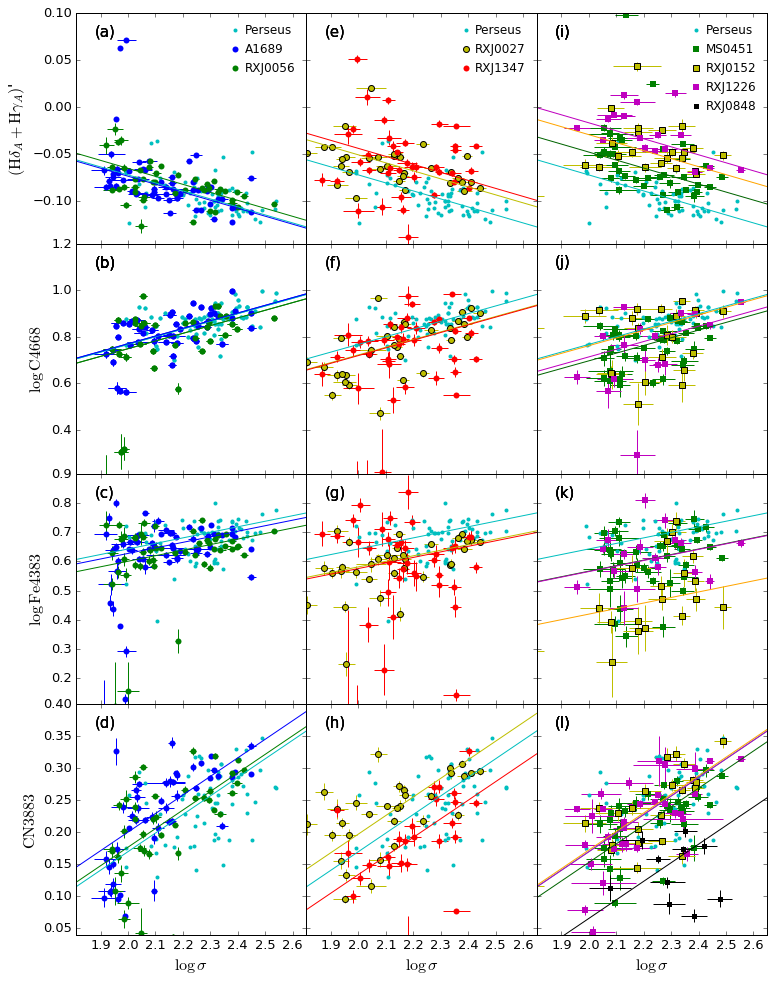

In [11]:
# All z<1 clusters - blue lines - for presentations
gs1 = gridspec.GridSpec(4,3)
gs1.update(left=0.15, right=0.95, bottom=0.15, top=0.95, wspace=0.0, hspace=0.0)
fig = plt.figure(figsize=(12,16))
ax = plt.axes([0., 0., 1., 1.], frameon=False, xticks=[],yticks=[])

print 'Cluster line     zero   dzero rms   N  Nrel'

ax1 = plt.subplot(gs1[0,0])
plt.setp(ax1.get_xticklabels(), visible=False)
plt.setp(ax1.get_yticklabels(), fontsize=13)

scatterplot(df_pers.lsigma_cor, df_pers.lhdga_cor, None, None, 'co', 4,
           '', r"$({\rm H}\delta _A + {\rm H}\gamma _A)$'", lsigmalim[0], lsigmalim[1], -0.145, 0.1, ax1, '(a)', 'Perseus')
scatterplot(df_a1689.lsigma_cor, df_a1689.lhdga_cor, df_a1689.e_lsigma, df_a1689.e_lhdga, 'bo', 6,
           '', r"$({\rm H}\delta _A + {\rm H}\gamma _A)$'", lsigmalim[0], lsigmalim[1], -0.145, 0.1, ax1, '(a)', 'A1689')
scatterplot(df_rxj0056.lsigma_cor, df_rxj0056.lhdga_cor, df_rxj0056.e_lsigma, df_rxj0056.e_lhdga, 'go', 6,
           '', r"$({\rm H}\delta _A + {\rm H}\gamma _A)$'", lsigmalim[0], lsigmalim[1], -0.145, 0.1, ax1, '(a)', 'RXJ0056')
# The Coma relation
calcline(lsigmalim[0], lsigmalim[1], lhdga[0], lhdga[1], 'c')
# A1689
da1689 = df_a1689.lhdga_cor-lhdga[0]*df_a1689.lsigma_cor-lhdga[1]
calcline(lsigmalim[0], lsigmalim[1], lhdga[0], np.nanmedian(da1689)+lhdga[1], 'b')
print 'A1689  ', 'HdgA    {0:6.3f}'.format(np.nanmedian(da1689)+lhdga[1]), \
    '{0:6.3f}'.format(np.nanmedian(da1689)), \
    '{0:5.3f}'.format(np.nanstd(da1689)), da1689.size, np.count_nonzero(~np.isnan(da1689))
# RXJ0056
drxj0056 = df_rxj0056.lhdga_cor-lhdga[0]*df_rxj0056.lsigma_cor-lhdga[1]
calcline(lsigmalim[0], lsigmalim[1], lhdga[0], np.nanmedian(drxj0056)+lhdga[1], 'g')
print 'RXJ0056', 'HdgA    {0:6.3f}'.format(np.nanmedian(drxj0056)+lhdga[1]), \
    '{0:6.3f}'.format(np.nanmedian(drxj0056)), \
    '{0:5.3f}'.format(np.nanstd(drxj0056)), drxj0056.size, np.count_nonzero(~np.isnan(drxj0056))

df_zps['zp_lhdga']['A1689'] = np.nanmedian(da1689) + lhdga[1]
df_zps['rms_lhdga']['A1689'] = np.nanstd(da1689)
df_zps['ngal_lhdga']['A1689'] = np.count_nonzero(~np.isnan(da1689))
df_zps['zp_lhdga']['RXJ0056'] = np.nanmedian(drxj0056) + lhdga[1]
df_zps['rms_lhdga']['RXJ0056'] = np.nanstd(drxj0056)
df_zps['ngal_lhdga']['RXJ0056'] = np.count_nonzero(~np.isnan(drxj0056))

# get handles
handles, labels = ax1.get_legend_handles_labels()
# remove the errorbars
handles = [h[0] for h in handles]
# use them in the legend
ax1.legend(handles, labels, loc='upper right',numpoints=1, handletextpad=-0.2, frameon=False)


ax2 = plt.subplot(gs1[0,1])
plt.setp(ax2.get_xticklabels(), visible=False)
plt.setp(ax2.get_yticklabels(), visible=False)

scatterplot(df_pers.lsigma_cor, df_pers.lhdga_cor, None, None, 'co', 4,
           '', '', lsigmalim[0], lsigmalim[1], -0.145, 0.1, ax2, '(e)', 'Perseus')
scatterplot(df_rxj0027.lsigma_cor, df_rxj0027.lhdga_cor, df_rxj0027.e_lsigma, df_rxj0027.e_lhdga, 'yo', 6,
           '', '', lsigmalim[0], lsigmalim[1], -0.145, 0.1, ax2, '(e)', 'RXJ0027')
scatterplot(df_rxj1347.lsigma_cor, df_rxj1347.lhdga_cor, df_rxj1347.e_lsigma, df_rxj1347.e_lhdga, 'ro', 6,
           '', '', lsigmalim[0], lsigmalim[1], -0.145, 0.1, ax2, '(e)', 'RXJ1347')
# The Coma relation
calcline(lsigmalim[0], lsigmalim[1], lhdga[0], lhdga[1], 'c')
# RXJ0027
drxj0027 = df_rxj0027.lhdga_cor-lhdga[0]*df_rxj0027.lsigma_cor-lhdga[1]
calcline(lsigmalim[0], lsigmalim[1], lhdga[0], np.nanmedian(drxj0027)+lhdga[1], 'y')
print 'RXJ0027', 'HdgA    {0:6.3f}'.format(np.nanmedian(drxj0027)+lhdga[1]), \
    '{0:6.3f}'.format(np.nanmedian(drxj0027)), \
    '{0:5.3f}'.format(np.nanstd(drxj0027)), drxj0027.size, np.count_nonzero(~np.isnan(drxj0027))
# RXJ1347
drxj1347 = df_rxj1347.lhdga_cor-lhdga[0]*df_rxj1347.lsigma_cor-lhdga[1]
calcline(lsigmalim[0], lsigmalim[1], lhdga[0], np.nanmedian(drxj1347)+lhdga[1], 'r')
print 'RXJ1347', 'HdgA    {0:6.3f}'.format(np.nanmedian(drxj1347)+lhdga[1]), \
    '{0:6.3f}'.format(np.nanmedian(drxj1347)), \
    '{0:5.3f}'.format(np.nanstd(drxj1347)), drxj1347.size, np.count_nonzero(~np.isnan(drxj1347))

df_zps['zp_lhdga']['RXJ0027'] = np.nanmedian(drxj0027) + lhdga[1]
df_zps['rms_lhdga']['RXJ0027'] = np.nanstd(drxj0027)
df_zps['ngal_lhdga']['RXJ0027'] = np.count_nonzero(~np.isnan(drxj0027))
df_zps['zp_lhdga']['RXJ1347'] = np.nanmedian(drxj1347) + lhdga[1]
df_zps['rms_lhdga']['RXJ1347'] = np.nanstd(drxj1347)
df_zps['ngal_lhdga']['RXJ1347'] = np.count_nonzero(~np.isnan(drxj1347))

df_zps['e_zp_lhdga'] = df_zps.rms_lhdga / np.sqrt(df_zps.ngal_lhdga)
    
# get handles
handles, labels = ax2.get_legend_handles_labels()
# remove the errorbars
handles = [h[0] for h in handles]
# use them in the legend
ax2.legend(handles, labels, loc='upper right',numpoints=1, handletextpad=-0.2, frameon=False)

# = high z clusters
ax2 = plt.subplot(gs1[0,2])
plt.setp(ax2.get_xticklabels(), visible=False)
plt.setp(ax2.get_yticklabels(), visible=False)

scatterplot(df_pers.lsigma_cor, df_pers.lhdga_cor, None, None, 'co', 4,
           '', '', lsigmalim[0], lsigmalim[1], -0.145, 0.1, ax2, '(i)', 'Perseus')
scatterplot(df_ms0451.lsigma_cor, df_ms0451.lhdga_cor, df_ms0451.e_lsigma, df_ms0451.e_lhdga, 'gs', 6,
           '', '', lsigmalim[0], lsigmalim[1], -0.145, 0.1, ax2, '(i)', 'MS0451')
scatterplot(df_rxj0152.lsigma_cor, df_rxj0152.lhdga_cor, df_rxj0152.e_lsigma, df_rxj0152.e_lhdga, 'ys', 6,
           '', '', lsigmalim[0], lsigmalim[1], -0.145, 0.1, ax2, '(i)', 'RXJ0152')
scatterplot(df_rxj1226.lsigma_cor, df_rxj1226.lhdga_cor, df_rxj1226.e_lsigma, df_rxj1226.e_lhdga, 'ms', 6,
           '', '', lsigmalim[0], lsigmalim[1], -0.145, 0.1, ax2, '(i)', 'RXJ1226')
# only to get the handle for the legend - none of these points are inside the panel
scatterplot(df_rxj0848.lsigma_cor, df_rxj0848.b_0sex, None, None, 'ks', 5,
           '', '', lsigmalim[0], lsigmalim[1], -0.145, 0.1, ax2, '(i)', 'RXJ0848')

# The Coma relation
calcline(lsigmalim[0], lsigmalim[1], lhdga[0], lhdga[1], 'c')
# MS0451
dms0451 = df_ms0451.lhdga_cor-lhdga[0]*df_ms0451.lsigma_cor-lhdga[1]
calcline(lsigmalim[0], lsigmalim[1], lhdga[0], np.nanmedian(dms0451)+lhdga[1], 'darkgreen')
print 'ms0451', 'HdgA    {0:6.3f}'.format(np.nanmedian(dms0451)+lhdga[1]), \
    '{0:6.3f}'.format(np.nanmedian(dms0451)), \
    '{0:5.3f}'.format(np.nanstd(dms0451)), dms0451.size, np.count_nonzero(~np.isnan(dms0451))
# RXJ0152
drxj0152 = df_rxj0152.lhdga_cor-lhdga[0]*df_rxj0152.lsigma_cor-lhdga[1]
calcline(lsigmalim[0], lsigmalim[1], lhdga[0], np.nanmedian(drxj0152)+lhdga[1], 'orange')
print 'RXJ0152', 'HdgA    {0:6.3f}'.format(np.nanmedian(drxj0152)+lhdga[1]), \
    '{0:6.3f}'.format(np.nanmedian(drxj0152)), \
    '{0:5.3f}'.format(np.nanstd(drxj0152)), drxj0152.size, np.count_nonzero(~np.isnan(drxj0152))
# RXJ1226
drxj1226 = df_rxj1226.lhdga_cor-lhdga[0]*df_rxj1226.lsigma_cor-lhdga[1]
calcline(lsigmalim[0], lsigmalim[1], lhdga[0], np.nanmedian(drxj1226)+lhdga[1], 'm')
print 'RXJ1226', 'HdgA    {0:6.3f}'.format(np.nanmedian(drxj1226)+lhdga[1]), \
    '{0:6.3f}'.format(np.nanmedian(drxj1226)), \
    '{0:5.3f}'.format(np.nanstd(drxj1226)), drxj1226.size, np.count_nonzero(~np.isnan(drxj1226))
    
    
# get handles
handles, labels = ax2.get_legend_handles_labels()
# remove the errorbars
handles = [h[0] for h in handles]
# use them in the legend
ax2.legend(handles, labels, loc='upper right',numpoints=1, handletextpad=-0.2, frameon=False)

# =============
ax3 = plt.subplot(gs1[1,0])
plt.setp(ax3.get_xticklabels(), visible=False)
plt.setp(ax3.get_yticklabels(), fontsize=13)

scatterplot(df_pers.lsigma_cor, df_pers.lc4668_cor, None, None, 'co', 4,
           '', r'$\log\, {\rm C4668}$', lsigmalim[0], lsigmalim[1], 0.21, 1.2, ax3, '(b)', 'Perseus')
scatterplot(df_a1689.lsigma_cor, df_a1689.lc4668_cor, df_a1689.e_lsigma, df_a1689.e_lc4668, 'bo', 6,
           '', r'$\log\, {\rm C4668}$', lsigmalim[0], lsigmalim[1], 0.21, 1.2, ax3, '(b)', 'A1689')
scatterplot(df_rxj0056.lsigma_cor, df_rxj0056.lc4668_cor, df_rxj0056.e_lsigma, df_rxj0056.e_lc4668, 'go', 6,
           '', r'$\log\, {\rm C4668}$', lsigmalim[0], lsigmalim[1], 0.21, 1.2, ax3, '(b)', 'RXJ0056')
# The Coma relation
calcline(lsigmalim[0], lsigmalim[1], lc4668[0], lc4668[1], 'c')
# A1689
da1689 = df_a1689.lc4668_cor-lc4668[0]*df_a1689.lsigma_cor-lc4668[1]
calcline(lsigmalim[0], lsigmalim[1], lc4668[0], np.nanmedian(da1689)+lc4668[1], 'b')
print 'A1689  ', 'C4668   {0:6.3f}'.format(np.nanmedian(da1689)+lc4668[1]), \
    '{0:6.3f}'.format(np.nanmedian(da1689)), \
    '{0:5.3f}'.format(np.nanstd(da1689)), da1689.size, np.count_nonzero(~np.isnan(da1689))
# RXJ0056
drxj0056 = df_rxj0056.lc4668_cor-lc4668[0]*df_rxj0056.lsigma_cor-lc4668[1]
calcline(lsigmalim[0], lsigmalim[1], lc4668[0], np.nanmedian(drxj0056)+lc4668[1], 'g')
print 'RXJ0056', 'C4668   {0:6.3f}'.format(np.nanmedian(drxj0056)+lc4668[1]), \
    '{0:6.3f}'.format(np.nanmedian(drxj0056)), \
    '{0:5.3f}'.format(np.nanstd(drxj0056)), drxj0056.size, np.count_nonzero(~np.isnan(drxj0056))
df_zps['zp_lc4668']['A1689'] = np.nanmedian(da1689) + lc4668[1]
df_zps['rms_lc4668']['A1689'] = np.nanstd(da1689)
df_zps['ngal_lc4668']['A1689'] = np.count_nonzero(~np.isnan(da1689))
df_zps['zp_lc4668']['RXJ0056'] = np.nanmedian(drxj0056) + lc4668[1]
df_zps['rms_lc4668']['RXJ0056'] = np.nanstd(drxj0056)
df_zps['ngal_lc4668']['RXJ0056'] = np.count_nonzero(~np.isnan(drxj0056))    

ax4 = plt.subplot(gs1[1,1])
plt.setp(ax4.get_xticklabels(), visible=False)
plt.setp(ax4.get_yticklabels(), visible=False)

scatterplot(df_pers.lsigma_cor, df_pers.lc4668_cor, None, None, 'co', 4,
           '', '', lsigmalim[0], lsigmalim[1], 0.21, 1.2, ax4, '(f)', 'Perseus')
scatterplot(df_rxj0027.lsigma_cor, df_rxj0027.lc4668_cor, df_rxj0027.e_lsigma, df_rxj0027.e_lc4668, 'yo', 6,
           '', '', lsigmalim[0], lsigmalim[1], 0.21, 1.2, ax4, '(f)', 'RXJ0027')
scatterplot(df_rxj1347.lsigma_cor, df_rxj1347.lc4668_cor, df_rxj1347.e_lsigma, df_rxj1347.e_lc4668, 'ro', 6,
           '', '', lsigmalim[0], lsigmalim[1], 0.21, 1.2, ax4, '(f)', 'RXJ1347')
# The Coma relation
calcline(lsigmalim[0], lsigmalim[1], lc4668[0], lc4668[1], 'c')
# RXJ0027
drxj0027 = df_rxj0027.lc4668_cor-lc4668[0]*df_rxj0027.lsigma_cor-lc4668[1]
calcline(lsigmalim[0], lsigmalim[1], lc4668[0], np.nanmedian(drxj0027)+lc4668[1], 'y')
print 'RXJ0027', 'C4668   {0:6.3f}'.format(np.nanmedian(drxj0027)+lc4668[1]), \
    '{0:6.3f}'.format(np.nanmedian(drxj0027)), \
    '{0:5.3f}'.format(np.nanstd(drxj0027)), drxj0027.size, np.count_nonzero(~np.isnan(drxj0027))
# RXJ1347
drxj1347 = df_rxj1347.lc4668_cor-lc4668[0]*df_rxj1347.lsigma_cor-lc4668[1]
calcline(lsigmalim[0], lsigmalim[1], lc4668[0], np.nanmedian(drxj1347)+lc4668[1], 'r')
print 'RXJ1347', 'C4668   {0:6.3f}'.format(np.nanmedian(drxj1347)+lc4668[1]), \
    '{0:6.3f}'.format(np.nanmedian(drxj1347)), \
    '{0:5.3f}'.format(np.nanstd(drxj1347)), drxj1347.size, np.count_nonzero(~np.isnan(drxj1347))
df_zps['zp_lc4668']['RXJ0027'] = np.nanmedian(drxj0027) + lc4668[1]
df_zps['rms_lc4668']['RXJ0027'] = np.nanstd(drxj0027)
df_zps['ngal_lc4668']['RXJ0027'] = np.count_nonzero(~np.isnan(drxj0027))
df_zps['zp_lc4668']['RXJ1347'] = np.nanmedian(drxj1347) + lc4668[1]
df_zps['rms_lc4668']['RXJ1347'] = np.nanstd(drxj1347)
df_zps['ngal_lc4668']['RXJ1347'] = np.count_nonzero(~np.isnan(drxj1347))

df_zps['e_zp_lc4668'] = df_zps.rms_lc4668 / np.sqrt(df_zps.ngal_lc4668)

ax3 = plt.subplot(gs1[1,0])
plt.setp(ax3.get_xticklabels(), visible=False)
plt.setp(ax3.get_yticklabels(), fontsize=13)

scatterplot(df_pers.lsigma_cor, df_pers.lc4668_cor, None, None, 'co', 4,
           '', r'$\log\, {\rm C4668}$', lsigmalim[0], lsigmalim[1], 0.21, 1.2, ax3, '(b)', 'Perseus')
scatterplot(df_a1689.lsigma_cor, df_a1689.lc4668_cor, df_a1689.e_lsigma, df_a1689.e_lc4668, 'bo', 6,
           '', r'$\log\, {\rm C4668}$', lsigmalim[0], lsigmalim[1], 0.21, 1.2, ax3, '(b)', 'A1689')
scatterplot(df_rxj0056.lsigma_cor, df_rxj0056.lc4668_cor, df_rxj0056.e_lsigma, df_rxj0056.e_lc4668, 'go', 6,
           '', r'$\log\, {\rm C4668}$', lsigmalim[0], lsigmalim[1], 0.21, 1.2, ax3, '(b)', 'RXJ0056')
# The Coma relation
calcline(lsigmalim[0], lsigmalim[1], lc4668[0], lc4668[1], 'c')
# A1689
da1689 = df_a1689.lc4668_cor-lc4668[0]*df_a1689.lsigma_cor-lc4668[1]
calcline(lsigmalim[0], lsigmalim[1], lc4668[0], np.nanmedian(da1689)+lc4668[1], 'b')
print 'A1689  ', 'C4668   {0:6.3f}'.format(np.nanmedian(da1689)+lc4668[1]), \
    '{0:6.3f}'.format(np.nanmedian(da1689)), \
    '{0:5.3f}'.format(np.nanstd(da1689)), da1689.size, np.count_nonzero(~np.isnan(da1689))
# RXJ0056
drxj0056 = df_rxj0056.lc4668_cor-lc4668[0]*df_rxj0056.lsigma_cor-lc4668[1]
calcline(lsigmalim[0], lsigmalim[1], lc4668[0], np.nanmedian(drxj0056)+lc4668[1], 'g')
print 'RXJ0056', 'C4668   {0:6.3f}'.format(np.nanmedian(drxj0056)+lc4668[1]), \
    '{0:6.3f}'.format(np.nanmedian(drxj0056)), \
    '{0:5.3f}'.format(np.nanstd(drxj0056)), drxj0056.size, np.count_nonzero(~np.isnan(drxj0056))
df_zps['zp_lc4668']['A1689'] = np.nanmedian(da1689) + lc4668[1]
df_zps['rms_lc4668']['A1689'] = np.nanstd(da1689)
df_zps['ngal_lc4668']['A1689'] = np.count_nonzero(~np.isnan(da1689))
df_zps['zp_lc4668']['RXJ0056'] = np.nanmedian(drxj0056) + lc4668[1]
df_zps['rms_lc4668']['RXJ0056'] = np.nanstd(drxj0056)
df_zps['ngal_lc4668']['RXJ0056'] = np.count_nonzero(~np.isnan(drxj0056))    

# == high-z clusters 
ax4 = plt.subplot(gs1[1,2])
plt.setp(ax4.get_xticklabels(), visible=False)
plt.setp(ax4.get_yticklabels(), visible=False)

scatterplot(df_pers.lsigma_cor, df_pers.lc4668_cor, None, None, 'co', 4,
           '', '', lsigmalim[0], lsigmalim[1], 0.21, 1.2, ax4, '(j)', 'Perseus')
scatterplot(df_ms0451.lsigma_cor, df_ms0451.lc4668_cor, df_ms0451.e_lsigma, df_ms0451.e_lc4668, 'gs', 6,
           '', '', lsigmalim[0], lsigmalim[1], 0.21, 1.2, ax4, '(j)', 'ms0451')
scatterplot(df_rxj0152.lsigma_cor, df_rxj0152.lc4668_cor, df_rxj0152.e_lsigma, df_rxj0152.e_lc4668, 'ys', 6,
           '', '', lsigmalim[0], lsigmalim[1], 0.21, 1.2, ax4, '(j)', 'RXJ0152')
scatterplot(df_rxj1226.lsigma_cor, df_rxj1226.lc4668_cor, df_rxj1226.e_lsigma, df_rxj1226.e_lc4668, 'ms', 6,
           '', '', lsigmalim[0], lsigmalim[1], 0.21, 1.2, ax4, '(j)', 'RXJ1347')
# The Coma relation
calcline(lsigmalim[0], lsigmalim[1], lc4668[0], lc4668[1], 'c')
# ms0451
dms0451 = df_ms0451.lc4668_cor-lc4668[0]*df_ms0451.lsigma_cor-lc4668[1]
calcline(lsigmalim[0], lsigmalim[1], lc4668[0], np.nanmedian(dms0451)+lc4668[1], 'darkgreen')
print 'ms0451', 'C4668   {0:6.3f}'.format(np.nanmedian(dms0451)+lc4668[1]), \
    '{0:6.3f}'.format(np.nanmedian(dms0451)), \
    '{0:5.3f}'.format(np.nanstd(dms0451)), dms0451.size, np.count_nonzero(~np.isnan(dms0451))
# RXJ0152
drxj0152 = df_rxj0152.lc4668_cor-lc4668[0]*df_rxj0152.lsigma_cor-lc4668[1]
calcline(lsigmalim[0], lsigmalim[1], lc4668[0], np.nanmedian(drxj0152)+lc4668[1], 'orange')
print 'RXJ0152', 'C4668   {0:6.3f}'.format(np.nanmedian(drxj1347)+lc4668[1]), \
    '{0:6.3f}'.format(np.nanmedian(drxj0152)), \
    '{0:5.3f}'.format(np.nanstd(drxj0152)), drxj0152.size, np.count_nonzero(~np.isnan(drxj0152))
# RXJ1226
drxj1226 = df_rxj1226.lc4668_cor-lc4668[0]*df_rxj1226.lsigma_cor-lc4668[1]
calcline(lsigmalim[0], lsigmalim[1], lc4668[0], np.nanmedian(drxj1226)+lc4668[1], 'm')
print 'RXJ1226', 'C4668   {0:6.3f}'.format(np.nanmedian(drxj1226)+lc4668[1]), \
    '{0:6.3f}'.format(np.nanmedian(drxj1226)), \
    '{0:5.3f}'.format(np.nanstd(drxj1226)), drxj1226.size, np.count_nonzero(~np.isnan(drxj1226))

# ===============
ax5 = plt.subplot(gs1[2,0])
plt.setp(ax5.get_xticklabels(), visible=False)
plt.setp(ax5.get_yticklabels(), fontsize=13)

scatterplot(df_pers.lsigma_cor, df_pers.lfe4383_cor, None, None, 'co', 4,
           '', r'$\log\, {\rm Fe4383}$', lsigmalim[0], lsigmalim[1], 0.11, 0.9, ax5, '(c)', 'Perseus')
scatterplot(df_a1689.lsigma_cor, df_a1689.lfe4383_cor, df_a1689.e_lsigma, df_a1689.e_lfe4383, 'bo', 6,
           '', r'$\log\, {\rm Fe4383}$', lsigmalim[0], lsigmalim[1], 0.11, 0.9, ax5, '(c)', 'A1689')
scatterplot(df_rxj0056.lsigma_cor, df_rxj0056.lfe4383_cor, df_rxj0056.e_lsigma, df_rxj0056.e_lfe4383, 'go', 6,
           '', r'$\log\, {\rm Fe4383}$', lsigmalim[0], lsigmalim[1], 0.11, 0.9, ax5, '(c)', 'RXJ0056')
# The Coma relation
calcline(lsigmalim[0], lsigmalim[1], lfe4383[0], lfe4383[1], 'c')
# A1689
da1689 = df_a1689.lfe4383_cor-lfe4383[0]*df_a1689.lsigma_cor-lfe4383[1]
calcline(lsigmalim[0], lsigmalim[1], lfe4383[0], np.nanmedian(da1689)+lfe4383[1], 'b')
print 'A1689  ', 'Fe4383  {0:6.3f}'.format(np.nanmedian(da1689)+lfe4383[1]), \
    '{0:6.3f}'.format(np.nanmedian(da1689)), \
    '{0:5.3f}'.format(np.nanstd(da1689)), da1689.size, np.count_nonzero(~np.isnan(da1689))
# RXJ0056
drxj0056 = df_rxj0056.lfe4383_cor-lfe4383[0]*df_rxj0056.lsigma_cor-lfe4383[1]
calcline(lsigmalim[0], lsigmalim[1], lfe4383[0], np.nanmedian(drxj0056)+lfe4383[1], 'g')
print 'RXJ0056', 'Fe4383  {0:6.3f}'.format(np.nanmedian(drxj0056)+lfe4383[1]), \
    '{0:6.3f}'.format(np.nanmedian(drxj0056)), \
    '{0:5.3f}'.format(np.nanstd(drxj0056)), drxj0056.size, np.count_nonzero(~np.isnan(drxj0056))
df_zps['zp_lfe4383']['A1689'] = np.nanmedian(da1689) + lfe4383[1]
df_zps['rms_lfe4383']['A1689'] = np.nanstd(da1689)
df_zps['ngal_lfe4383']['A1689'] = np.count_nonzero(~np.isnan(da1689))
df_zps['zp_lfe4383']['RXJ0056'] = np.nanmedian(drxj0056) + lfe4383[1]
df_zps['rms_lfe4383']['RXJ0056'] = np.nanstd(drxj0056)
df_zps['ngal_lfe4383']['RXJ0056'] = np.count_nonzero(~np.isnan(drxj0056))    

ax6 = plt.subplot(gs1[2,1])
plt.setp(ax6.get_xticklabels(), visible=False)
plt.setp(ax6.get_yticklabels(), visible=False)

scatterplot(df_pers.lsigma_cor, df_pers.lfe4383_cor, None, None, 'co', 4,
           '', '', lsigmalim[0], lsigmalim[1], 0.11, 0.9, ax6, '(g)', 'Perseus')
scatterplot(df_rxj0027.lsigma_cor, df_rxj0027.lfe4383_cor, df_rxj0027.e_lsigma, df_rxj0027.e_lfe4383, 'yo', 6,
           '', '', lsigmalim[0], lsigmalim[1], 0.11, 0.9, ax6, '(g)', 'RXJ0027')
scatterplot(df_rxj1347.lsigma_cor, df_rxj1347.lfe4383_cor, df_rxj1347.e_lsigma, df_rxj1347.e_lfe4383, 'ro', 6,
           '', '', lsigmalim[0], lsigmalim[1], 0.11, 0.9, ax6, '(g)', 'RXJ1347')
# The Coma relation
calcline(lsigmalim[0], lsigmalim[1], lfe4383[0], lfe4383[1], 'c')
# RXJ0027
drxj0027 = df_rxj0027.lfe4383_cor-lfe4383[0]*df_rxj0027.lsigma_cor-lfe4383[1]
calcline(lsigmalim[0], lsigmalim[1], lfe4383[0], np.nanmedian(drxj0027)+lfe4383[1], 'y')
print 'RXJ0027', 'Fe4383  {0:6.3f}'.format(np.nanmedian(drxj0027)+lfe4383[1]), \
    '{0:6.3f}'.format(np.nanmedian(drxj0027)), \
    '{0:5.3f}'.format(np.nanstd(drxj0027)), drxj0027.size, np.count_nonzero(~np.isnan(drxj0027))
# RXJ1347
drxj1347 = df_rxj1347.lfe4383_cor-lfe4383[0]*df_rxj1347.lsigma_cor-lfe4383[1]
calcline(lsigmalim[0], lsigmalim[1], lfe4383[0], np.nanmedian(drxj1347)+lfe4383[1], 'r')
print 'RXJ1347', 'Fe4383  {0:6.3f}'.format(np.nanmedian(drxj1347)+lfe4383[1]), \
    '{0:6.3f}'.format(np.nanmedian(drxj1347)), \
    '{0:5.3f}'.format(np.nanstd(drxj1347)), drxj1347.size, np.count_nonzero(~np.isnan(drxj1347))
df_zps['zp_lfe4383']['RXJ0027'] = np.nanmedian(drxj0027) + lfe4383[1]
df_zps['rms_lfe4383']['RXJ0027'] = np.nanstd(drxj0027)
df_zps['ngal_lfe4383']['RXJ0027'] = np.count_nonzero(~np.isnan(drxj0027))
df_zps['zp_lfe4383']['RXJ1347'] = np.nanmedian(drxj1347) + lfe4383[1]
df_zps['rms_lfe4383']['RXJ1347'] = np.nanstd(drxj1347)
df_zps['ngal_lfe4383']['RXJ1347'] = np.count_nonzero(~np.isnan(drxj1347))

df_zps['e_zp_lfe4383'] = df_zps.rms_lfe4383 / np.sqrt(df_zps.ngal_lfe4383)

ax6 = plt.subplot(gs1[2,2])
plt.setp(ax6.get_xticklabels(), visible=False)
plt.setp(ax6.get_yticklabels(), visible=False)

scatterplot(df_pers.lsigma_cor, df_pers.lfe4383_cor, None, None, 'co', 4,
           '', '', lsigmalim[0], lsigmalim[1], 0.11, 0.9, ax6, '(k)', 'Perseus')
scatterplot(df_ms0451.lsigma_cor, df_ms0451.lfe4383_cor, df_ms0451.e_lsigma, df_ms0451.e_lfe4383, 'gs', 6,
           '', '', lsigmalim[0], lsigmalim[1], 0.11, 0.9, ax6, '(k)', 'MS0451')
scatterplot(df_rxj0152.lsigma_cor, df_rxj0152.lfe4383_cor, df_rxj0152.e_lsigma, df_rxj0152.e_lfe4383, 'ys', 6,
           '', '', lsigmalim[0], lsigmalim[1], 0.11, 0.9, ax6, '(k)', 'RXJ0152')
scatterplot(df_rxj1226.lsigma_cor, df_rxj1226.lfe4383_cor, df_rxj1226.e_lsigma, df_rxj1226.e_lfe4383, 'ms', 6,
           '', '', lsigmalim[0], lsigmalim[1], 0.11, 0.9, ax6, '(k)', 'RXJ1226')
# The Coma relation
calcline(lsigmalim[0], lsigmalim[1], lfe4383[0], lfe4383[1], 'c')
# MS0451
dms0451 = df_ms0451.lfe4383_cor-lfe4383[0]*df_ms0451.lsigma_cor-lfe4383[1]
calcline(lsigmalim[0], lsigmalim[1], lfe4383[0], np.nanmedian(dms0451)+lfe4383[1], 'darkgreen')
print 'ms0451', 'Fe4383  {0:6.3f}'.format(np.nanmedian(dms0451)+lfe4383[1]), \
    '{0:6.3f}'.format(np.nanmedian(dms0451)), \
    '{0:5.3f}'.format(np.nanstd(dms0451)), dms0451.size, np.count_nonzero(~np.isnan(dms0451))
# RXJ0152
drxj0152 = df_rxj0152.lfe4383_cor-lfe4383[0]*df_rxj0152.lsigma_cor-lfe4383[1]
calcline(lsigmalim[0], lsigmalim[1], lfe4383[0], np.nanmedian(drxj0152)+lfe4383[1], 'orange')
print 'RXJ0152', 'Fe4383  {0:6.3f}'.format(np.nanmedian(drxj0152)+lfe4383[1]), \
    '{0:6.3f}'.format(np.nanmedian(drxj0152)), \
    '{0:5.3f}'.format(np.nanstd(drxj0152)), drxj0152.size, np.count_nonzero(~np.isnan(drxj0152))
# RXJ1226
drxj1226 = df_rxj1226.lfe4383_cor-lfe4383[0]*df_rxj1226.lsigma_cor-lfe4383[1]
calcline(lsigmalim[0], lsigmalim[1], lfe4383[0], np.nanmedian(drxj1226)+lfe4383[1], 'm')
print 'RXJ1226', 'Fe4383  {0:6.3f}'.format(np.nanmedian(drxj1226)+lfe4383[1]), \
    '{0:6.3f}'.format(np.nanmedian(drxj1226)), \
    '{0:5.3f}'.format(np.nanstd(drxj1226)), drxj1226.size, np.count_nonzero(~np.isnan(drxj1226))

# ==============
ax7 = plt.subplot(gs1[3,0])
plt.setp(ax7.get_xticklabels(), fontsize=13)
plt.setp(ax7.get_yticklabels(), fontsize=13)

scatterplot(df_pers.lsigma_cor, df_pers.cn3883_cor, None, None, 'co', 4,
           r'$\log\, \sigma$', r'${\rm CN3883}$', lsigmalim[0], lsigmalim[1], 0.04, 0.4, ax7, '(d)', 'Perseus')
scatterplot(df_a1689.lsigma_cor, df_a1689.cn3883_cor, df_a1689.e_lsigma, df_a1689.e_cn3883, 'bo', 6,
           r'$\log\, \sigma$', r'${\rm CN3883}$', lsigmalim[0], lsigmalim[1], 0.04, 0.4, ax7, '(d)', 'A1689')
scatterplot(df_rxj0056.lsigma_cor, df_rxj0056.cn3883_cor, df_rxj0056.e_lsigma, df_rxj0056.e_cn3883, 'go', 6,
           r'$\log\, \sigma$', r'${\rm CN3883}$', lsigmalim[0], lsigmalim[1], 0.04, 0.4, ax7, '(d)', 'RXJ0056')
# The Coma relation
calcline(lsigmalim[0], lsigmalim[1], cn3883[0], cn3883[1], 'c')
# A1689
da1689 = df_a1689.cn3883_cor-cn3883[0]*df_a1689.lsigma_cor-cn3883[1]
calcline(lsigmalim[0], lsigmalim[1], cn3883[0], np.nanmedian(da1689)+cn3883[1], 'b')
print 'A1689  ', 'CN3883  {0:6.3f}'.format(np.nanmedian(da1689)+cn3883[1]), \
    '{0:6.3f}'.format(np.nanmedian(da1689)), \
    '{0:5.3f}'.format(np.nanstd(da1689)), da1689.size, np.count_nonzero(~np.isnan(da1689))
# RXJ0056
drxj0056 = df_rxj0056.cn3883_cor-cn3883[0]*df_rxj0056.lsigma_cor-cn3883[1]
calcline(lsigmalim[0], lsigmalim[1], cn3883[0], np.nanmedian(drxj0056)+cn3883[1], 'g')
print 'RXJ0056', 'CN3883  {0:6.3f}'.format(np.nanmedian(drxj0056)+cn3883[1]), \
    '{0:6.3f}'.format(np.nanmedian(drxj0056)), \
    '{0:5.3f}'.format(np.nanstd(drxj0056)), drxj0056.size, np.count_nonzero(~np.isnan(drxj0056))
df_zps['zp_cn3883']['A1689'] = np.nanmedian(da1689) + cn3883[1]
df_zps['rms_cn3883']['A1689'] = np.nanstd(da1689)
df_zps['ngal_cn3883']['A1689'] = np.count_nonzero(~np.isnan(da1689))
df_zps['zp_cn3883']['RXJ0056'] = np.nanmedian(drxj0056) + cn3883[1]
df_zps['rms_cn3883']['RXJ0056'] = np.nanstd(drxj0056)
df_zps['ngal_cn3883']['RXJ0056'] = np.count_nonzero(~np.isnan(drxj0056))        

ax8 = plt.subplot(gs1[3,1])
plt.setp(ax8.get_xticklabels(), fontsize=13)
plt.setp(ax8.get_yticklabels(), visible=False)

scatterplot(df_pers.lsigma_cor, df_pers.cn3883_cor, None, None, 'co', 4,
           r'$\log\, \sigma$', '', lsigmalim[0], lsigmalim[1], 0.04, 0.4, ax8, '(h)', 'Perseus')
scatterplot(df_rxj0027.lsigma_cor, df_rxj0027.cn3883_cor, df_rxj0027.e_lsigma, df_rxj0027.e_cn3883, 'yo', 6,
           r'$\log\, \sigma$', '', lsigmalim[0], lsigmalim[1], 0.04, 0.4, ax8, '(h)', 'RXJ0027')
scatterplot(df_rxj1347.lsigma_cor, df_rxj1347.cn3883_cor, df_rxj1347.e_lsigma, df_rxj1347.e_cn3883, 'ro', 6,
           r'$\log\, \sigma$', '', lsigmalim[0], lsigmalim[1], 0.04, 0.4, ax8, '(h)', 'RXJ1347')
# The Coma relation
calcline(lsigmalim[0], lsigmalim[1], cn3883[0], cn3883[1], 'c')
# RXJ0027
drxj0027 = df_rxj0027.cn3883_cor-cn3883[0]*df_rxj0027.lsigma_cor-cn3883[1]
calcline(lsigmalim[0], lsigmalim[1], cn3883[0], np.nanmedian(drxj0027)+cn3883[1], 'y')
print 'RXJ0027', 'CN3883  {0:6.3f}'.format(np.nanmedian(drxj0027)+cn3883[1]), \
    '{0:6.3f}'.format(np.nanmedian(drxj0027)), \
    '{0:5.3f}'.format(np.nanstd(drxj0027)), drxj0027.size, np.count_nonzero(~np.isnan(drxj0027))
# RXJ1347
drxj1347 = df_rxj1347.cn3883_cor-cn3883[0]*df_rxj1347.lsigma_cor-cn3883[1]
calcline(lsigmalim[0], lsigmalim[1], cn3883[0], np.nanmedian(drxj1347)+cn3883[1], 'r')
print 'RXJ1347', 'cn3883  {0:6.3f}'.format(np.nanmedian(drxj1347)+cn3883[1]), \
    '{0:6.3f}'.format(np.nanmedian(drxj1347)), \
    '{0:5.3f}'.format(np.nanstd(drxj1347)), drxj1347.size, np.count_nonzero(~np.isnan(drxj1347))
df_zps['zp_cn3883']['RXJ0027'] = np.nanmedian(drxj0027) + cn3883[1]
df_zps['rms_cn3883']['RXJ0027'] = np.nanstd(drxj0027)
df_zps['ngal_cn3883']['RXJ0027'] = np.count_nonzero(~np.isnan(drxj0027))
df_zps['zp_cn3883']['RXJ1347'] = np.nanmedian(drxj1347) + cn3883[1]
df_zps['rms_cn3883']['RXJ1347'] = np.nanstd(drxj1347)
df_zps['ngal_cn3883']['RXJ1347'] = np.count_nonzero(~np.isnan(drxj1347))

df_zps['e_zp_cn3883'] = df_zps.rms_cn3883 / np.sqrt(df_zps.ngal_cn3883)

df_zps['dzp_lhdga'] = df_zps.zp_lhdga - df_zps.at['lowz','zp_lhdga']
df_zps['dzp_lc4668'] = df_zps.zp_lc4668 - df_zps.at['lowz','zp_lc4668']
df_zps['dzp_lfe4383'] = df_zps.zp_lfe4383 - df_zps.at['lowz','zp_lfe4383']
df_zps['dzp_cn3883'] = df_zps.zp_cn3883 - df_zps.at['lowz','zp_cn3883']

# ====
ax8 = plt.subplot(gs1[3,2])
plt.setp(ax8.get_xticklabels(), fontsize=13)
plt.setp(ax8.get_yticklabels(), visible=False)

scatterplot(df_pers.lsigma_cor, df_pers.cn3883_cor, None, None, 'co', 4,
           r'$\log\, \sigma$', '', lsigmalim[0], lsigmalim[1], 0.04, 0.4, ax8, '(l)', 'Perseus')
scatterplot(df_ms0451.lsigma_cor, df_ms0451.cn3883_cor, df_ms0451.e_lsigma, df_ms0451.e_cn3883, 'gs', 6,
           r'$\log\, \sigma$', '', lsigmalim[0], lsigmalim[1], 0.04, 0.4, ax8, '(l)', 'MS0451')
scatterplot(df_rxj0152.lsigma_cor, df_rxj0152.cn3883_cor, df_rxj0152.e_lsigma, df_rxj0152.e_cn3883, 'ys', 6,
           r'$\log\, \sigma$', '', lsigmalim[0], lsigmalim[1], 0.04, 0.4, ax8, '(l)', 'RXJ0152')
scatterplot(df_rxj1226.lsigma_cor, df_rxj1226.cn3883_cor, df_rxj1226.e_lsigma, df_rxj1226.e_cn3883, 'ms', 6,
           r'$\log\, \sigma$', '', lsigmalim[0], lsigmalim[1], 0.04, 0.4, ax8, '(l)', 'RXJ1226')
scatterplot(df_rxj0848.lsigma_cor, df_rxj0848.cn3883_cor, df_rxj0848.e_lsigma, df_rxj0848.e_cn3883, 'ks', 5,
           r'$\log\, \sigma$', '', lsigmalim[0], lsigmalim[1], 0.04, 0.4, ax8, '(l)', 'RXJ0848')
# The Coma relation
calcline(lsigmalim[0], lsigmalim[1], cn3883[0], cn3883[1], 'c')
# MS0451
dms0451 = df_ms0451.cn3883_cor-cn3883[0]*df_ms0451.lsigma_cor-cn3883[1]
calcline(lsigmalim[0], lsigmalim[1], cn3883[0], np.nanmedian(dms0451)+cn3883[1], 'darkgreen')
print 'MS0451', 'CN3883  {0:6.3f}'.format(np.nanmedian(dms0451)+cn3883[1]), \
    '{0:6.3f}'.format(np.nanmedian(dms0451)), \
    '{0:5.3f}'.format(np.nanstd(dms0451)), dms0451.size, np.count_nonzero(~np.isnan(dms0451))
# RXJ0152
drxj0152 = df_rxj0152.cn3883_cor-cn3883[0]*df_rxj0152.lsigma_cor-cn3883[1]
calcline(lsigmalim[0], lsigmalim[1], cn3883[0], np.nanmedian(drxj0152)+cn3883[1], 'orange')
print 'RXJ0152', 'CN3883  {0:6.3f}'.format(np.nanmedian(drxj0152)+cn3883[1]), \
    '{0:6.3f}'.format(np.nanmedian(drxj0152)), \
    '{0:5.3f}'.format(np.nanstd(drxj0152)), drxj0152.size, np.count_nonzero(~np.isnan(drxj0152))
# RXJ1226
drxj1226 = df_rxj1226.cn3883_cor-cn3883[0]*df_rxj1226.lsigma_cor-cn3883[1]
calcline(lsigmalim[0], lsigmalim[1], cn3883[0], np.nanmedian(drxj1226)+cn3883[1], 'm')
print 'RXJ1226', 'CN3883  {0:6.3f}'.format(np.nanmedian(drxj1226)+cn3883[1]), \
    '{0:6.3f}'.format(np.nanmedian(drxj1226)), \
    '{0:5.3f}'.format(np.nanstd(drxj1226)), drxj1226.size, np.count_nonzero(~np.isnan(drxj1226))
# RXJ0848
drxj0848 = df_rxj0848.cn3883_cor-cn3883[0]*df_rxj0848.lsigma_cor-cn3883[1]
calcline(lsigmalim[0], lsigmalim[1], cn3883[0], np.nanmedian(drxj0848)+cn3883[1], 'k')
print 'RXJ0848', 'CN3883  {0:6.3f}'.format(np.nanmedian(drxj0848)+cn3883[1]), \
    '{0:6.3f}'.format(np.nanmedian(drxj0848)), \
    '{0:5.3f}'.format(np.nanstd(drxj0848)), drxj1226.size, np.count_nonzero(~np.isnan(drxj0848))


df_zps['dzp_lhdga'] = df_zps.zp_lhdga - df_zps.at['lowz','zp_lhdga']
df_zps['dzp_lc4668'] = df_zps.zp_lc4668 - df_zps.at['lowz','zp_lc4668']
df_zps['dzp_lfe4383'] = df_zps.zp_lfe4383 - df_zps.at['lowz','zp_lfe4383']
df_zps['dzp_cn3883'] = df_zps.zp_cn3883 - df_zps.at['lowz','zp_cn3883']

print df_zps


plt.savefig('lsigma_blueline_all.pdf', format="pdf")

** Zero point differences versus Redshift - all indices **

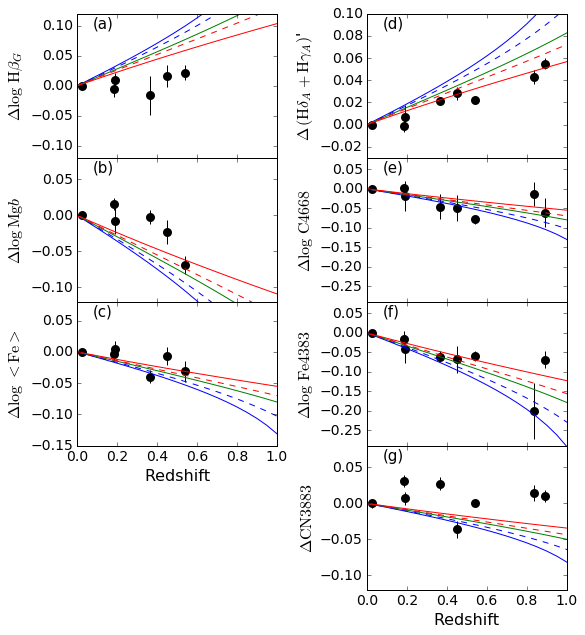

In [12]:
gs1 = gridspec.GridSpec(4,2)
gs1.update(left=0.15, right=0.95, bottom=0.15, top=0.95, wspace=0.45, hspace=0.0)
fig = plt.figure(figsize=(8.5,10))
ax = plt.axes([0., 0., 1., 1.], frameon=False, xticks=[],yticks=[])

ax1 = plt.subplot(gs1[0,0])
plt.setp(ax1.get_xticklabels(), visible=False)
plt.setp(ax1.get_yticklabels(), fontsize=14)
scatterplot(df_zps.redshift, df_zps.dzp_lhbeta, None, df_zps.e_zp_lhbeta, 'ko', 9,
           '', r'$\Delta \log\,\, {\rm H}\beta _G$', 0, 1, -0.12, 0.12, ax1, '(a)', 'lHbeta')
plt.plot(df_cosmology.z, df_cosmology.dlhbetagz12, 'b')
plt.plot(df_cosmology.z, df_cosmology.dlhbetagz14, 'b--')
plt.plot(df_cosmology.z, df_cosmology.dlhbetagz18, 'g')
plt.plot(df_cosmology.z, df_cosmology.dlhbetagz22, 'r--')
plt.plot(df_cosmology.z, df_cosmology.dlhbetagz40, 'r')

ax2 = plt.subplot(gs1[1,0])
plt.setp(ax2.get_xticklabels(), visible=False)
plt.setp(ax2.get_yticklabels(), fontsize=14)
scatterplot(df_zps.redshift, df_zps.dzp_lmgb, None, df_zps.e_zp_lmgb, 'ko', 9,
           '', r'$\Delta \log\, {\rm Mg}b$', 0, 1, -0.12, 0.08, ax2, '(b)', 'lMgb')
plt.plot(df_cosmology.z, df_cosmology.dlmgbz12, 'b')
plt.plot(df_cosmology.z, df_cosmology.dlmgbz14, 'b--')
plt.plot(df_cosmology.z, df_cosmology.dlmgbz18, 'g')
plt.plot(df_cosmology.z, df_cosmology.dlmgbz22, 'r--')
plt.plot(df_cosmology.z, df_cosmology.dlmgbz40, 'r')


ax3 = plt.subplot(gs1[2,0])
plt.setp(ax3.get_xticklabels(), fontsize=14)
plt.setp(ax3.get_yticklabels(), fontsize=14)
scatterplot(df_zps.redshift, df_zps.dzp_lfe, None, df_zps.e_zp_lfe, 'ko', 9,
           'Redshift', r'$\Delta \log\,\, <{\rm Fe}>$', 0, 1, -0.15, 0.08, ax3, '(c)', 'lFe')
plt.plot(df_cosmology.z, df_cosmology.dlfez12, 'b')
plt.plot(df_cosmology.z, df_cosmology.dlfez14, 'b--')
plt.plot(df_cosmology.z, df_cosmology.dlfez18, 'g')
plt.plot(df_cosmology.z, df_cosmology.dlfez22, 'r--')
plt.plot(df_cosmology.z, df_cosmology.dlfez40, 'r')

# ========
ax4 = plt.subplot(gs1[0,1])
plt.setp(ax4.get_xticklabels(), visible=False)
plt.setp(ax4.get_yticklabels(), fontsize=14)
scatterplot(df_zps.redshift, df_zps.dzp_lhdga, None, df_zps.e_zp_lhdga, 'ko', 9,
           '', r"$\Delta\, ({\rm H}\delta _A + {\rm H}\gamma _A)$'", 0, 1, -0.03, 0.1, ax4, '(d)', 'lHdga')
plt.plot(df_cosmology.z, df_cosmology.dlhdgaz12, 'b')
plt.plot(df_cosmology.z, df_cosmology.dlhdgaz14, 'b--')
plt.plot(df_cosmology.z, df_cosmology.dlhdgaz18, 'g')
plt.plot(df_cosmology.z, df_cosmology.dlhdgaz22, 'r--')
plt.plot(df_cosmology.z, df_cosmology.dlhdgaz40, 'r')


ax5 = plt.subplot(gs1[1,1])
plt.setp(ax5.get_xticklabels(), visible=False)
plt.setp(ax5.get_yticklabels(), fontsize=14)
scatterplot(df_zps.redshift, df_zps.dzp_lc4668, None, df_zps.e_zp_lc4668, 'ko', 9,
           '', r'$\Delta \log\,\, {\rm C4668}$', 0, 1, -0.29, 0.08, ax5, '(e)', 'lC4668')
plt.plot(df_cosmology.z, df_cosmology.dlc4668z12, 'b')
plt.plot(df_cosmology.z, df_cosmology.dlc4668z14, 'b--')
plt.plot(df_cosmology.z, df_cosmology.dlc4668z18, 'g')
plt.plot(df_cosmology.z, df_cosmology.dlc4668z22, 'r--')
plt.plot(df_cosmology.z, df_cosmology.dlc4668z40, 'r')

ax6 = plt.subplot(gs1[2,1])
plt.setp(ax6.get_xticklabels(), visible=False)
plt.setp(ax6.get_yticklabels(), fontsize=14)
scatterplot(df_zps.redshift, df_zps.dzp_lfe4383, None, df_zps.e_zp_lfe4383, 'ko', 9,
           '', r'$\Delta \log\,\, {\rm Fe4383}$', 0, 1, -0.29, 0.08, ax6, '(f)', 'lFe4383')
plt.plot(df_cosmology.z, df_cosmology.dlfe4383z12, 'b')
plt.plot(df_cosmology.z, df_cosmology.dlfe4383z14, 'b--')
plt.plot(df_cosmology.z, df_cosmology.dlfe4383z18, 'g')
plt.plot(df_cosmology.z, df_cosmology.dlfe4383z22, 'r--')
plt.plot(df_cosmology.z, df_cosmology.dlfe4383z40, 'r')

ax7 = plt.subplot(gs1[3,1])
plt.setp(ax7.get_xticklabels(), fontsize=14)
plt.setp(ax7.get_yticklabels(), fontsize=14)
scatterplot(df_zps.redshift, df_zps.dzp_cn3883, None, df_zps.e_zp_cn3883, 'ko', 9,
           'Redshift', r'$\Delta {\rm CN3883}$', 0, 1, -0.12, 0.08, ax7, '(g)', 'CN3883')
plt.plot(df_cosmology.z, df_cosmology.dcn3883z12, 'b')
plt.plot(df_cosmology.z, df_cosmology.dcn3883z14, 'b--')
plt.plot(df_cosmology.z, df_cosmology.dcn3883z18, 'g')
plt.plot(df_cosmology.z, df_cosmology.dcn3883z22, 'r--')
plt.plot(df_cosmology.z, df_cosmology.dcn3883z40, 'r')

plt.savefig('zeropoints.eps', format="eps")

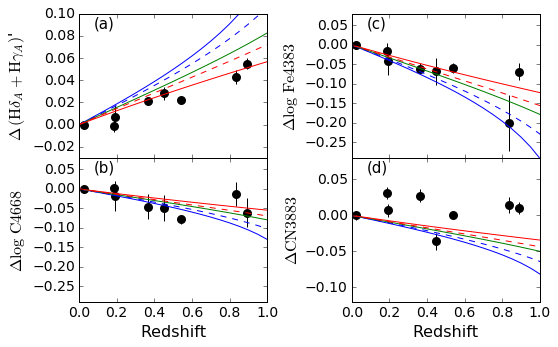

In [13]:
# Blue indices only - for presentations 
gs1 = gridspec.GridSpec(2,2)
gs1.update(left=0.15, right=0.95, bottom=0.15, top=0.95, wspace=0.45, hspace=0.0)
fig = plt.figure(figsize=(8,5))
ax = plt.axes([0., 0., 1., 1.], frameon=False, xticks=[],yticks=[])



# ========
ax4 = plt.subplot(gs1[0,0])
plt.setp(ax4.get_xticklabels(), visible=False)
plt.setp(ax4.get_yticklabels(), fontsize=14)
scatterplot(df_zps.redshift, df_zps.dzp_lhdga, None, df_zps.e_zp_lhdga, 'ko', 9,
           '', r"$\Delta\, ({\rm H}\delta _A + {\rm H}\gamma _A)$'", 0, 1, -0.03, 0.1, ax4, '(a)', 'lHdga')
plt.plot(df_cosmology.z, df_cosmology.dlhdgaz12, 'b')
plt.plot(df_cosmology.z, df_cosmology.dlhdgaz14, 'b--')
plt.plot(df_cosmology.z, df_cosmology.dlhdgaz18, 'g')
plt.plot(df_cosmology.z, df_cosmology.dlhdgaz22, 'r--')
plt.plot(df_cosmology.z, df_cosmology.dlhdgaz40, 'r')


ax5 = plt.subplot(gs1[1,0])
plt.setp(ax5.get_xticklabels(), fontsize=14)
plt.setp(ax5.get_yticklabels(), fontsize=14)
scatterplot(df_zps.redshift, df_zps.dzp_lc4668, None, df_zps.e_zp_lc4668, 'ko', 9,
           'Redshift', r'$\Delta \log\,\, {\rm C4668}$', 0, 1, -0.29, 0.08, ax5, '(b)', 'lC4668')
plt.plot(df_cosmology.z, df_cosmology.dlc4668z12, 'b')
plt.plot(df_cosmology.z, df_cosmology.dlc4668z14, 'b--')
plt.plot(df_cosmology.z, df_cosmology.dlc4668z18, 'g')
plt.plot(df_cosmology.z, df_cosmology.dlc4668z22, 'r--')
plt.plot(df_cosmology.z, df_cosmology.dlc4668z40, 'r')

ax6 = plt.subplot(gs1[0,1])
plt.setp(ax6.get_xticklabels(), visible=False)
plt.setp(ax6.get_yticklabels(), fontsize=14)
scatterplot(df_zps.redshift, df_zps.dzp_lfe4383, None, df_zps.e_zp_lfe4383, 'ko', 9,
           '', r'$\Delta \log\,\, {\rm Fe4383}$', 0, 1, -0.29, 0.08, ax6, '(c)', 'lFe4383')
plt.plot(df_cosmology.z, df_cosmology.dlfe4383z12, 'b')
plt.plot(df_cosmology.z, df_cosmology.dlfe4383z14, 'b--')
plt.plot(df_cosmology.z, df_cosmology.dlfe4383z18, 'g')
plt.plot(df_cosmology.z, df_cosmology.dlfe4383z22, 'r--')
plt.plot(df_cosmology.z, df_cosmology.dlfe4383z40, 'r')

ax7 = plt.subplot(gs1[1,1])
plt.setp(ax7.get_xticklabels(), fontsize=14)
plt.setp(ax7.get_yticklabels(), fontsize=14)
scatterplot(df_zps.redshift, df_zps.dzp_cn3883, None, df_zps.e_zp_cn3883, 'ko', 9,
           'Redshift', r'$\Delta {\rm CN3883}$', 0, 1, -0.12, 0.08, ax7, '(d)', 'CN3883')
plt.plot(df_cosmology.z, df_cosmology.dcn3883z12, 'b')
plt.plot(df_cosmology.z, df_cosmology.dcn3883z14, 'b--')
plt.plot(df_cosmology.z, df_cosmology.dcn3883z18, 'g')
plt.plot(df_cosmology.z, df_cosmology.dcn3883z22, 'r--')
plt.plot(df_cosmology.z, df_cosmology.dcn3883z40, 'r')

plt.savefig('zeropoints_blue.pdf', format="pdf")

         lc4668fe     lhdga
lowz     1.075733 -0.092400
A1689    1.073305 -0.093766
RXJ0056  1.043168 -0.085403
RXJ0027  1.009912 -0.071041
RXJ1347  1.005325 -0.064178
MS0451   0.978067 -0.070400
RXJ0152  0.995733 -0.049400
RXJ1226  0.991733 -0.037400
RXJ0848       NaN       NaN


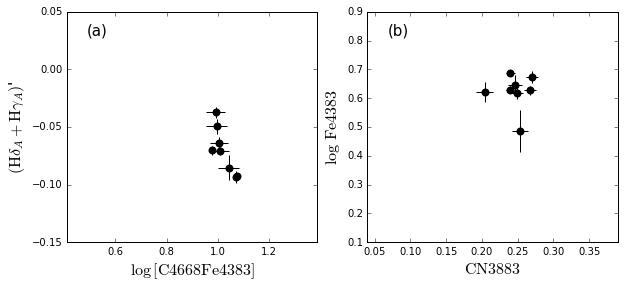

In [24]:
# what is in df_zps at this point - put the median indices on the 2 critical plots
# print df_zps.lc4668fe, df_zps.lhdga
print df_zps.ix[:,['lc4668fe','lhdga']]


gs1 = gridspec.GridSpec(1,2)
gs1.update(left=0.1, right=0.95, bottom=0.15, top=0.95, wspace=0.2, hspace=0.0)
fig = plt.figure(figsize=(9,4))
ax = plt.axes([0., 0., 1., 1.], frameon=False, xticks=[],yticks=[])

ax1 = plt.subplot(gs1[0,0])
plt.setp(ax1.get_xticklabels(), fontsize=10)
plt.setp(ax1.get_yticklabels(), fontsize=10)

scatterplot(df_zps.lc4668fe, df_zps.lhdga, df_zps.e_lc4668fe, df_zps.e_lhdga, 'ko', 8,
           r'$\log\, \rm{[C4668Fe4383]}$', r"$({\rm H}\delta _A + {\rm H}\gamma _A)$'", 0.41, 1.39, -0.15, 0.05, ax1, '(a)', 'clusters')

ax1 = plt.subplot(gs1[0,1])
plt.setp(ax1.get_xticklabels(), fontsize=10)
plt.setp(ax1.get_yticklabels(), fontsize=10)

#mkmodelgrid(0.0, 'cn3883', 'lfe4383', 'b', 1., mkarrows=True, anchorx=0.1, anchory=0.7)
#mkmodelgrid(0.3, 'cn3883', 'lfe4383', 'k', 1.5, mkarrows=False)
#mkmodelgrid(0.5, 'cn3883', 'lfe4383', 'g', 1., mkarrows=False)

scatterplot(df_zps.cn3883, df_zps.lfe4383, df_zps.e_cn3883, df_zps.e_lfe4383, 'ko', 8,
           r'$\rm{CN3883}$', r'$\log\,\, {\rm Fe4383}$', 0.04, 0.39, 0.1, 0.9, ax1, '(b)', 'clusters')




In [15]:
# Write unformatted FITS table - reindex and rename that column to have it included in the output fits
df_zpsn = df_zps.reset_index()
df_zpsn = df_zpsn.rename(columns = {'index':'cluster'}) 
#print df_zpsn

tab_zps = Table.from_pandas(df_zpsn)
#print tab_zps
#print df_zps
tab_zps.write('clusterzpsindices.fits', overwrite=True)

** At this point we take clusterzpsindices.fits out of here to derive ages, M/H, alpha/Fe **

** Then it comes back here as clusterzpsindices_ages.fits with those columns defined **

In [16]:
# read in the new clusterszpsindices_ages.fits
d = fits.getdata('clusterzpsindices_ages.fits')
df_zpsV2=pd.DataFrame(np.array(d).byteswap().newbyteorder())
df_zpsV2.columns = map(str.lower, df_zpsV2.columns)

#print df_cosmology
# set alpha_vis for two high z cluster to -1 to make them not show up in plots
#print df_zpsV2[6:,'alpha_vis'] 
#print df_zpsV2[6:7]['alpha_vis']
df_zpsV2.loc[6:8,'alpha_vis'] = -1.
#print df_zpsV2
print df_zpsV2[0:8]['cluster']

0       lowz
1      A1689
2    RXJ0056
3    RXJ0027
4    RXJ1347
5     MS0451
6    RXJ0152
7    RXJ1226
Name: cluster, dtype: object


In [ ]:
# Make the plot of age, M/H, alpha/Fe versus redshift - presentation version, blue only

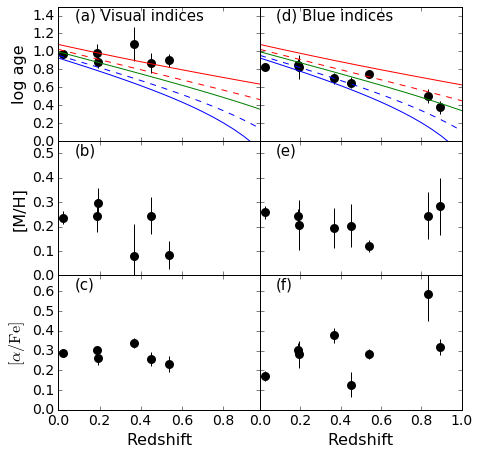

In [17]:
gs1 = gridspec.GridSpec(3,2)
gs1.update(left=0.15, right=0.95, bottom=0.15, top=0.95, wspace=0.0, hspace=0.0)
fig = plt.figure(figsize=(7,7))
ax = plt.axes([0., 0., 1., 1.], frameon=False, xticks=[],yticks=[])

ax1 = plt.subplot(gs1[0,0])
plt.setp(ax1.get_xticklabels(), visible=False)
plt.setp(ax1.get_yticklabels(), fontsize=14)
scatterplot(df_zpsV2.redshift, df_zpsV2.lage_visa025, None, df_zpsV2.e_lage_visa025, 'ko', 9,
           '', 'log age', 0, 0.98, 0, 1.5, ax1, '(a) Visual indices', 'agevis')
plt.plot(df_cosmology.z, df_cosmology.lagez12_gyr, 'b')
plt.plot(df_cosmology.z, df_cosmology.lagez14_gyr, 'b--')
plt.plot(df_cosmology.z, df_cosmology.lagez18_gyr, 'g')
plt.plot(df_cosmology.z, df_cosmology.lagez22_gyr, 'r--')
plt.plot(df_cosmology.z, df_cosmology.lagez40_gyr, 'r')

ax2 = plt.subplot(gs1[1,0])
plt.setp(ax2.get_xticklabels(), visible=False)
plt.setp(ax2.get_yticklabels(), fontsize=14)
scatterplot(df_zpsV2.redshift, df_zpsV2.feh_visa025, None, df_zpsV2.e_feh_visa025, 'ko', 9,
           '', '[M/H]', 0, 0.98, 0, 0.55, ax2, '(b)', 'MHvis')

ax3 = plt.subplot(gs1[2,0])
plt.setp(ax3.get_xticklabels(), fontsize=14)
plt.setp(ax3.get_yticklabels(), fontsize=14)
scatterplot(df_zpsV2.redshift, df_zpsV2.alpha_vis, None, df_zpsV2.e_alpha_vis, 'ko', 9,
           'Redshift', r'${\rm [ \alpha /Fe ]}$', 0, 0.98, 0, 0.68, ax3, '(c)', 'alphavis')

# ========
ax4 = plt.subplot(gs1[0,1])
plt.setp(ax4.get_xticklabels(), visible=False)
plt.setp(ax4.get_yticklabels(), visible=False)
scatterplot(df_zpsV2.redshift, df_zpsV2.lage_bluea025, None, df_zpsV2.e_lage_bluea025, 'ko', 9,
           '', '', 0, 1, 0, 1.5, ax4, '(d) Blue indices', 'ageblue')
plt.plot(df_cosmology.z, df_cosmology.lagez12_gyr, 'b')
plt.plot(df_cosmology.z, df_cosmology.lagez14_gyr, 'b--')
plt.plot(df_cosmology.z, df_cosmology.lagez18_gyr, 'g')
plt.plot(df_cosmology.z, df_cosmology.lagez22_gyr, 'r--')
plt.plot(df_cosmology.z, df_cosmology.lagez40_gyr, 'r')

ax5 = plt.subplot(gs1[1,1])
plt.setp(ax5.get_xticklabels(), visible=False)
plt.setp(ax5.get_yticklabels(), visible=False)
scatterplot(df_zpsV2.redshift, df_zpsV2.feh_bluea025, None, df_zpsV2.e_feh_bluea025, 'ko', 9,
           '', '', 0, 1, 0, 0.55, ax5, '(e)', 'MHblue')

ax6 = plt.subplot(gs1[2,1])
plt.setp(ax6.get_xticklabels(), fontsize=14)
plt.setp(ax6.get_yticklabels(), visible=False)
scatterplot(df_zpsV2.redshift, df_zpsV2.alpha_blue, None, df_zpsV2.e_alpha_blue, 'ko', 9,
           'Redshift', '', 0, 1, 0, 0.68, ax6, '(f)', 'alphablue')

#plt.savefig('agemetalalpha.eps', format="eps")
plt.savefig('agemetalalpha.pdf', format="pdf")

** HzetaA - adds nothing as the ages of these galaxies is in the interval of no sensitivity from HzetaA **

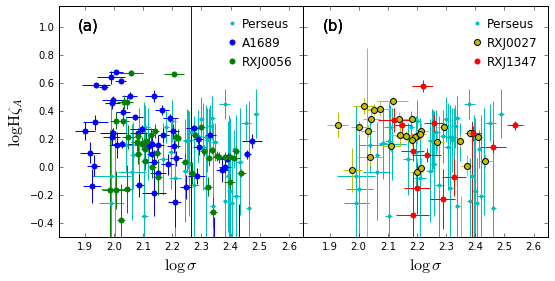

In [32]:
gs1 = gridspec.GridSpec(1,2)
gs1.update(left=0.1, right=0.95, bottom=0.15, top=0.95, wspace=0.0, hspace=0.0)
fig = plt.figure(figsize=(8,4))
ax = plt.axes([0., 0., 1., 1.], frameon=False, xticks=[],yticks=[])

ax1 = plt.subplot(gs1[0,0])
plt.setp(ax1.get_xticklabels(), fontsize=10)
plt.setp(ax1.get_yticklabels(), fontsize=10)

scatterplot(df_pers.lsigma_cor, df_pers.lhzetaa_cor, df_pers.e_lsigma, df_pers.e_lhzetaa, 'co', 4,
           r'$\log\, \sigma$', r'$\log {\rm H}\zeta _A$', 1.81, 2.65, -0.5, 1.15, ax1, '(a)', 'Perseus')
scatterplot(df_a1689.lsigma_cor, df_a1689.lhzetaa_cor, df_a1689.e_lsigma, df_a1689.e_lhzetaa, 'bo', 6,
           r'$\log\, \sigma$', r'$\log {\rm H}\zeta _A$', 1.81, 2.65, -0.5, 1.15, ax1, '(a)', 'A1689')
scatterplot(df_rxj0056.lsigma_cor, df_rxj0056.lhzetaa_cor, df_rxj0056.e_lsigma, df_rxj0056.e_lhzetaa, 'go', 6,
           r'$\log\, \sigma$', r'$\log {\rm H}\zeta _A$', 1.81, 2.65, -0.5, 1.15, ax1, '(a)', 'RXJ0056')
#ax1=plt.legend(numpoints=1, frameon=False, handletextpad=0.3, loc=4)
# get handles
handles, labels = ax1.get_legend_handles_labels()
# remove the errorbars
handles = [h[0] for h in handles]
# use them in the legend
ax1.legend(handles, labels, loc='upper right',numpoints=1, handletextpad=-0.2, frameon=False)


ax2 = plt.subplot(gs1[0,1])
plt.setp(ax2.get_xticklabels(), fontsize=10)
plt.setp(ax2.get_yticklabels(), visible=False)

scatterplot(df_pers.lsigma_cor, df_pers.lhzetaa_cor, df_pers.e_lsigma, df_pers.e_lhzetaa, 'co', 4,
           r'$\log\, \sigma$', '', 1.81, 2.65, -0.5, 1.15, ax2, '(b)', 'Perseus')
scatterplot(df_rxj0027.lsigma_cor, df_rxj0027.lhzetaa_cor, df_rxj0027.e_lsigma, df_rxj0027.e_lhzetaa, 'yo', 6,
           r'$\log\, \sigma$', '', 1.81, 2.65, -0.5, 1.15, ax2, '(b)', 'RXJ0027')
scatterplot(df_rxj1347.lsigma_cor, df_rxj1347.lhzetaa_cor, df_rxj1347.e_lsigma, df_rxj1347.e_lhzetaa, 'ro', 6,
           r'$\log\, \sigma$', '', 1.81, 2.65, -0.5, 1.15, ax2, '(b)', 'RXJ1347')
#ax2=plt.legend(numpoints=1, frameon=False, handletextpad=0.3, loc=4)

# get handles
handles, labels = ax2.get_legend_handles_labels()
# remove the errorbars
handles = [h[0] for h in handles]
# use them in the legend
ax2.legend(handles, labels, loc='upper right',numpoints=1, handletextpad=-0.2, frameon=False)


plt.savefig('output.eps', format="eps")

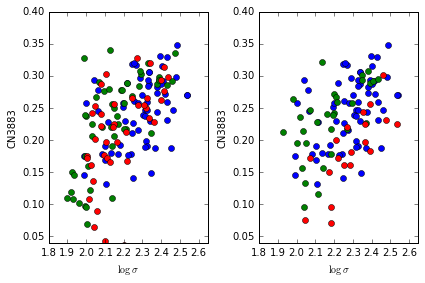

In [33]:
plt.subplot(121)

plt.plot(df_pers.lsigma_cor, df_pers.cn3883_cor, "bo")
plt.plot(df_a1689.lsigma_cor, df_a1689.cn3883_cor, "go")
plt.plot(df_rxj0056.lsigma_cor, df_rxj0056.cn3883_cor, "ro")
plt.ylabel('CN3883')
plt.xlabel(r'$\log\, \sigma$')
plt.xlim(1.8,2.65)
plt.ylim(0.04,0.4)

plt.subplot(122)

plt.plot(df_pers.lsigma_cor, df_pers.cn3883_cor, "bo")
plt.plot(df_rxj0027.lsigma_cor, df_rxj0027.cn3883_cor, "go")
plt.plot(df_rxj1347.lsigma_cor, df_rxj1347.cn3883_cor, "ro")
plt.ylabel('CN3883')
plt.xlabel(r'$\log\, \sigma$')
plt.xlim(1.8,2.65)
plt.ylim(0.04,0.4)
plt.tight_layout()